## Imports

In [ ]:
# Keras can be installed through Tensorflow, uncomment to install
# !pip install tensorflow

In [ ]:
# data management
import numpy as np                   # for linear algebra
import pandas as pd                  # for tabular data manipulation and processing

# machine learning
import sklearn                       # for data prep and classical ML
import tensorflow as tf              # for deep learning
from tensorflow import keras         # for deep learning
import keras.layers as L             # for easy NN layer access

# data visualization and graphics
import matplotlib.pyplot as plt      # for visualization fundamentals
import seaborn as sns                # for pretty visualizations
import cv2                           # for image manipulation

# misc
from tqdm.notebook import tqdm       # for progress bars
import math                          # for calculation
import sys                           # for system manipulation
import os                            # for file manipulation
import random                        # for dealing with things related to randomness

---

## Introduction to Keras

We will demostrate the basic functionality of Keras through a simple example using the Fashion MNIST Dataset

In [ ]:
# retrieving Fashion MNIST
# requires internet 
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


### Modeling with Keras

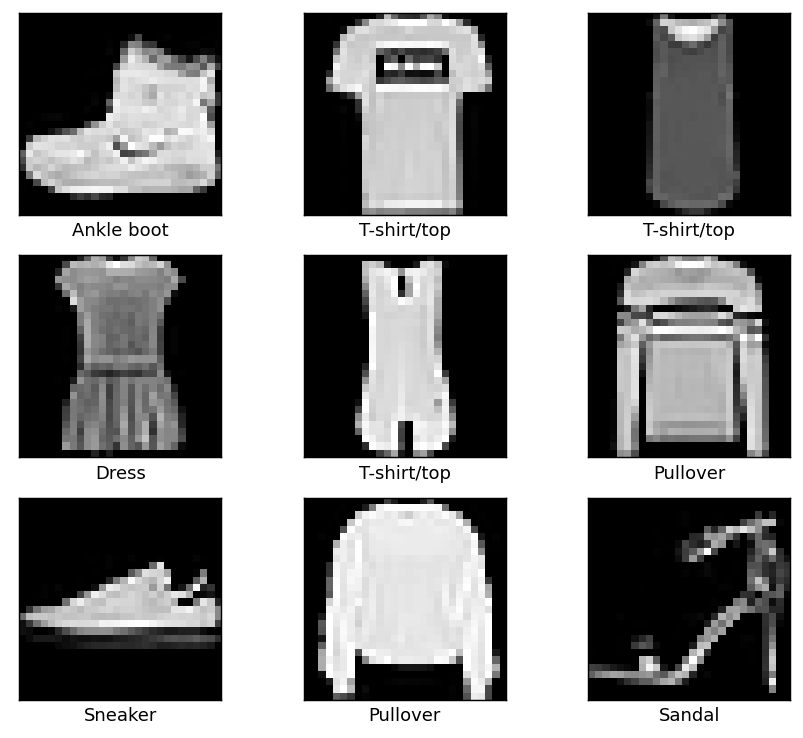

In [ ]:
# description of each target
targets = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# display images on a 3x3 grid
plt.figure(figsize=(8,7), dpi=130)
# 9=3x3
for i in range(9):
    # placing the image in the ith position of a 3 by 3 grid
    plt.subplot(3,3,i+1) 
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # extract data from training images, shown in grayscale
    plt.imshow(X_train[i], cmap="gray") 
    # get the respective target for the image
    plt.xlabel(targets[y_train[i]])
plt.show()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
# shape into (num_samples, 784)
X_train = X_train.reshape(X_train.shape[0], 28*28) 
# shape into (num_samples, 784)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [ ]:
# normalize
X_train = X_train/255.
X_test = X_test/255.

In [ ]:
# set to true to run on the whole data
full = True
if not full:
    X_train = X_train[:10000]
    y_train = y_train[:10000]

#### Defining Architecture 

In [ ]:
# import the dense and input layer
from keras.layers import Dense, Input
# the sequential model object
from keras.models import Sequential
# initialize
fashion_model = Sequential()
# add input layer, specify the input shape of one sample as a tuple
# in our case it would be (784, ) as it's one-dimensional
fashion_model.add(Input((784,)))

# add dense layers, the only parameter that we need to 
# worry about right now is the number of neurons, which
# we set to 64
fashion_model.add(Dense(64))
fashion_model.add(Dense(64))


# add output layer
# softmax activation can be specified by the "activation"
# parameter
fashion_model.add(Dense(10, activation="softmax"))

2022-05-10 05:18:07.445967: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 05:18:07.543717: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 05:18:07.544496: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-10 05:18:07.545576: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

#### Compiling the Model

In [ ]:
# import loss function
from keras.losses import SparseCategoricalCrossentropy
# sparse categorical cross entropy simply converts one-hot encoded vector(results from the network)
# to the index position at which the probability is the highest (actual target)
# we need to do this since the y_train is not one-hot encoded but targets are 
# represented by numbers 1-10
# if the target it one-hot encoded (i.e. in our case it would be in the shape of (60000,10))
# then just using "CategoricalCrossentropy" would be fine
fashion_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#### Training and Evaluation

In [ ]:
# batch_size is randomly chosen at 1024 here, 
# reader can change it and observe changes in training results
fashion_model.fit(X_test, y_test, epochs=15, batch_size=1024)

2022-05-10 05:18:10.047447: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
10/10 [==============================] - 1s 4ms/step - loss: 1.5872 - accuracy: 0.4527
Epoch 2/15
10/10 [==============================] - 0s 3ms/step - loss: 0.8887 - accuracy: 0.6887
Epoch 3/15
10/10 [==============================] - 0s 3ms/step - loss: 0.7322 - accuracy: 0.7344
Epoch 4/15
10/10 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 0.7645
Epoch 5/15
10/10 [==============================] - 0s 3ms/step - loss: 0.6181 - accuracy: 0.7865
Epoch 6/15
10/10 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.7960
Epoch 7/15
10/10 [==============================] - 0s 3ms/step - loss: 0.5546 - accuracy: 0.8052
Epoch 8/15
10/10 [==============================] - 0s 3ms/step - loss: 0.5393 - accuracy: 0.8162
Epoch 9/15
10/10 [==============================] - 0s 3ms/step - loss: 0.5215 - accuracy: 0.8193
Epoch 10/15
10/10 [==============================] - 0s 5ms/step - loss: 0.5085 - accuracy: 0.8241
Epoch 11/15
10/10 [

In [ ]:
# evaluation 
fashion_model.evaluate(X_test, y_test, batch_size=2048)

5/5 [==============================] - 0s 7ms/step - loss: 0.4625 - accuracy: 0.8398


[0.4624667465686798, 0.8398000001907349]

---

## Loss Fuctions
We will visualize the neural network loss landscape with landscapeviz

In [ ]:
# https://www.kaggle.com/datasets/andy1010/landscapeviz
# package used, link above, original code by riginal code by Artur Back de Luca on github 
# (https://github.com/artur-deluca/landscapeviz), modified to speed up calculations
import sys
sys.path.append("../input/landscapeviz")
import landscapeviz

In [ ]:
landscapeviz.build_mesh(fashion_model, (X_train, y_train), grid_length=20, verbose=True, eval_batch_size=2048)

line 0 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 1 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 2 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 3 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 4 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 5 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 6 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 7 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 8 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 9 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 10 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 11 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 12 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 13 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 14 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 15 out of 20
	 column 0 out of 20
	 column 10 out of 20
line 16 out of 20
	 column 0 out o

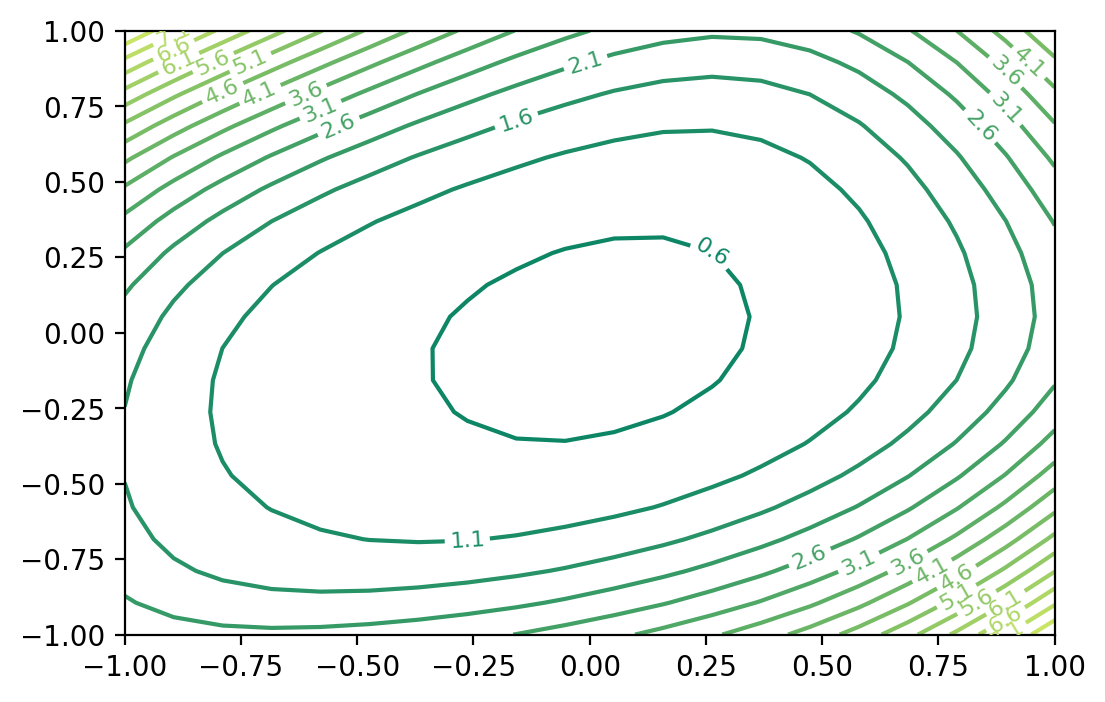

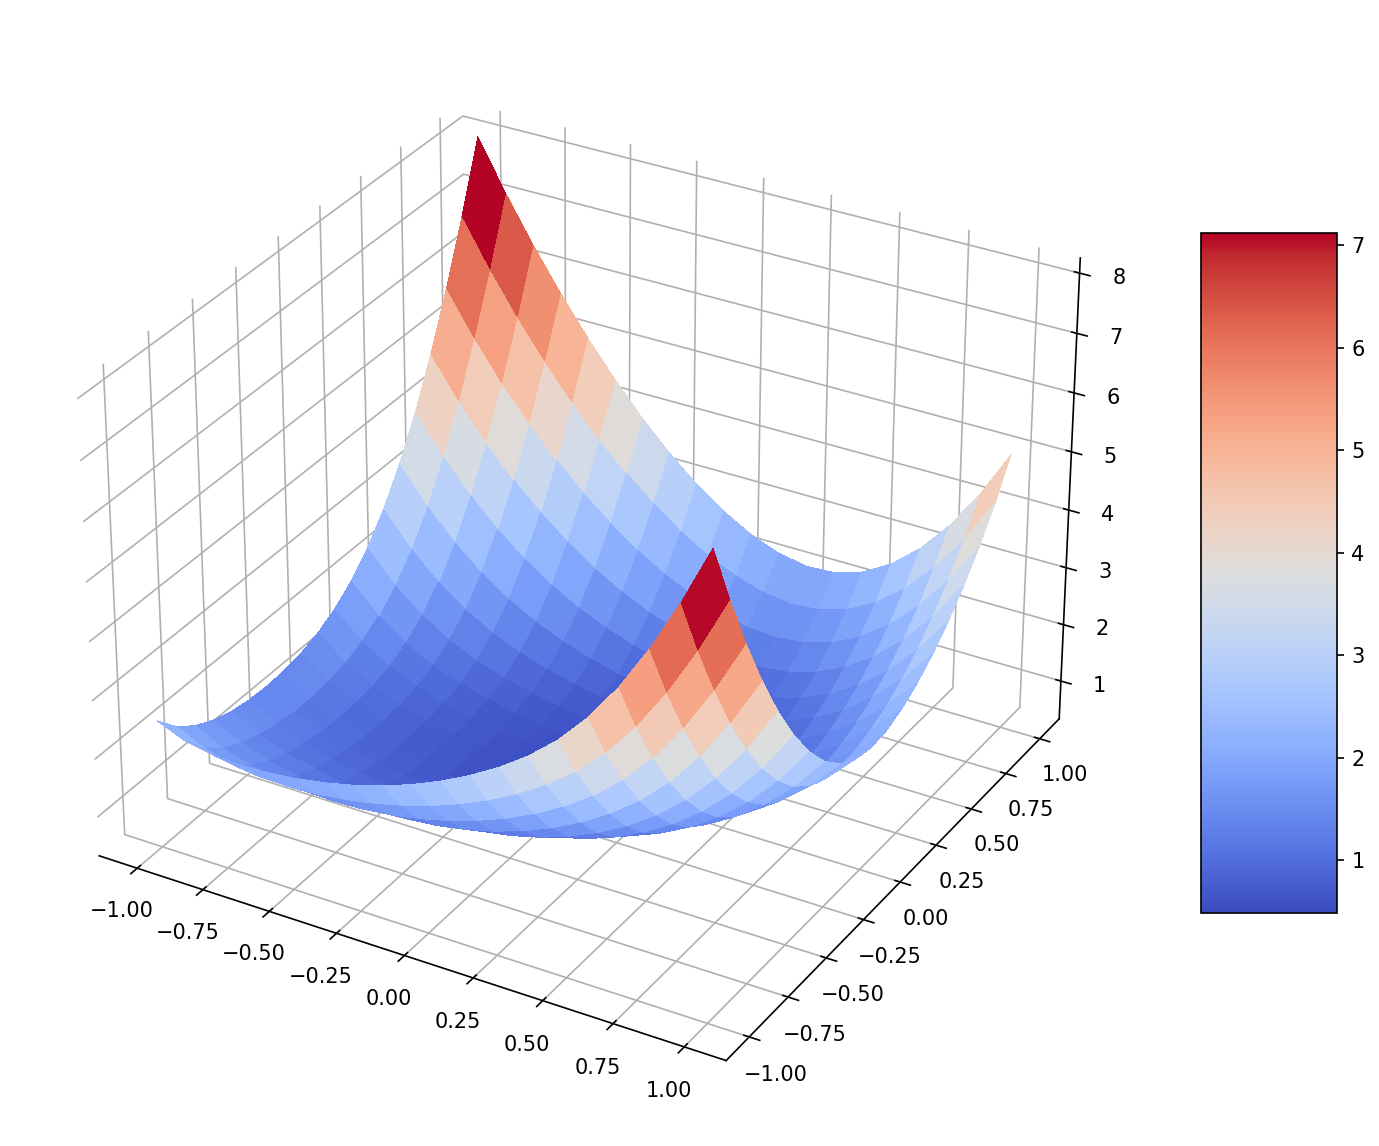

In [ ]:
landscapeviz.plot_contour(key="sparse_categorical_crossentropy", dpi=200)
landscapeviz.plot_3d(key="sparse_categorical_crossentropy", dpi=150, figsize=(12, 12))

---

## Math Behind Feedforward Operation

### Activation Functions

In [ ]:
# some styling stuff
import seaborn as sns
sns.set_style('dark')
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [ ]:
# demostration of activation's non linearity on NNs
# simple dataset that models a quadratic function

demo_x = np.array([i for i in range(-10, 11)])
# smooth out the data points for later graphing
demo_x = np.linspace(demo_x.min(), demo_x.max(), 300)  

demo_function = lambda x: ((1/2)*x)**2
demo_y = np.array([demo_function(i) for i in demo_x])

In [ ]:
# construct a simple one hidden layer with two neuron network with activations
# import the dense and input layer
from keras.layers import Dense, Input
# the sequential model object
from keras.models import Sequential
# optimizer, don't worry about it now
from tensorflow.keras.optimizers import Adam

# model with activation
nonlinear_model = Sequential()
nonlinear_model.add(Input((1,)))
# beta parameter is learned in this case
nonlinear_model.add(Dense(2, activation="swish"))
nonlinear_model.add(Dense(1, activation="linear"))
# learning rates will be discussed laterf
nonlinear_model.compile(optimizer=Adam(learning_rate=0.9), loss="mean_absolute_error",)

In [ ]:
nonlinear_model.fit(demo_x, demo_y, epochs=20, verbose=0)
print(f"Nonlinear model with swish activation function results: {nonlinear_model.evaluate(demo_x, demo_y)}")

10/10 [==============================] - 0s 2ms/step - loss: 3.8876
Nonlinear model with swish activation function results: 3.887589454650879


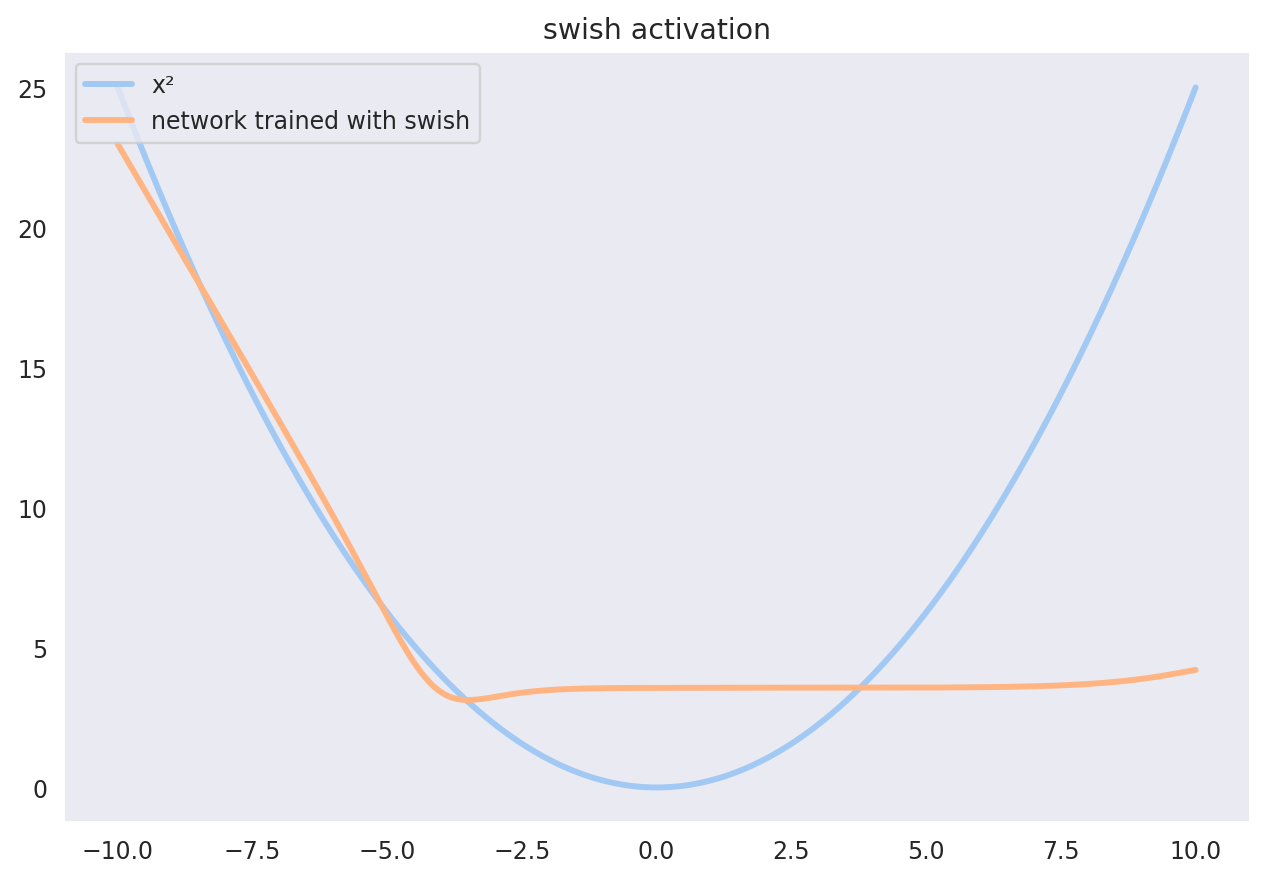

In [ ]:
# let's plot the network as a function
nonlinear_y = nonlinear_model.predict(demo_x)
plt.figure(figsize=(9, 6), dpi=170)
plt.plot(demo_x, demo_y, lw=2.5, c=sns.color_palette('pastel')[0], label="x²")
plt.plot(demo_x, nonlinear_y, lw=2.5, c=sns.color_palette('pastel')[1], label=f"network trained with swish")
plt.title('swish activation')
plt.legend(loc=2)

10/10 [==============================] - 0s 2ms/step - loss: 42.2315
Model with linear activation function results: 42.23146438598633
10/10 [==============================] - 0s 2ms/step - loss: 3.9517
Model with relu activation function results: 3.951749563217163
10/10 [==============================] - 0s 2ms/step - loss: 6.2052
Model with sigmoid activation function results: 6.205206871032715
10/10 [==============================] - 0s 2ms/step - loss: 4.9399
Model with elu activation function results: 4.939864158630371


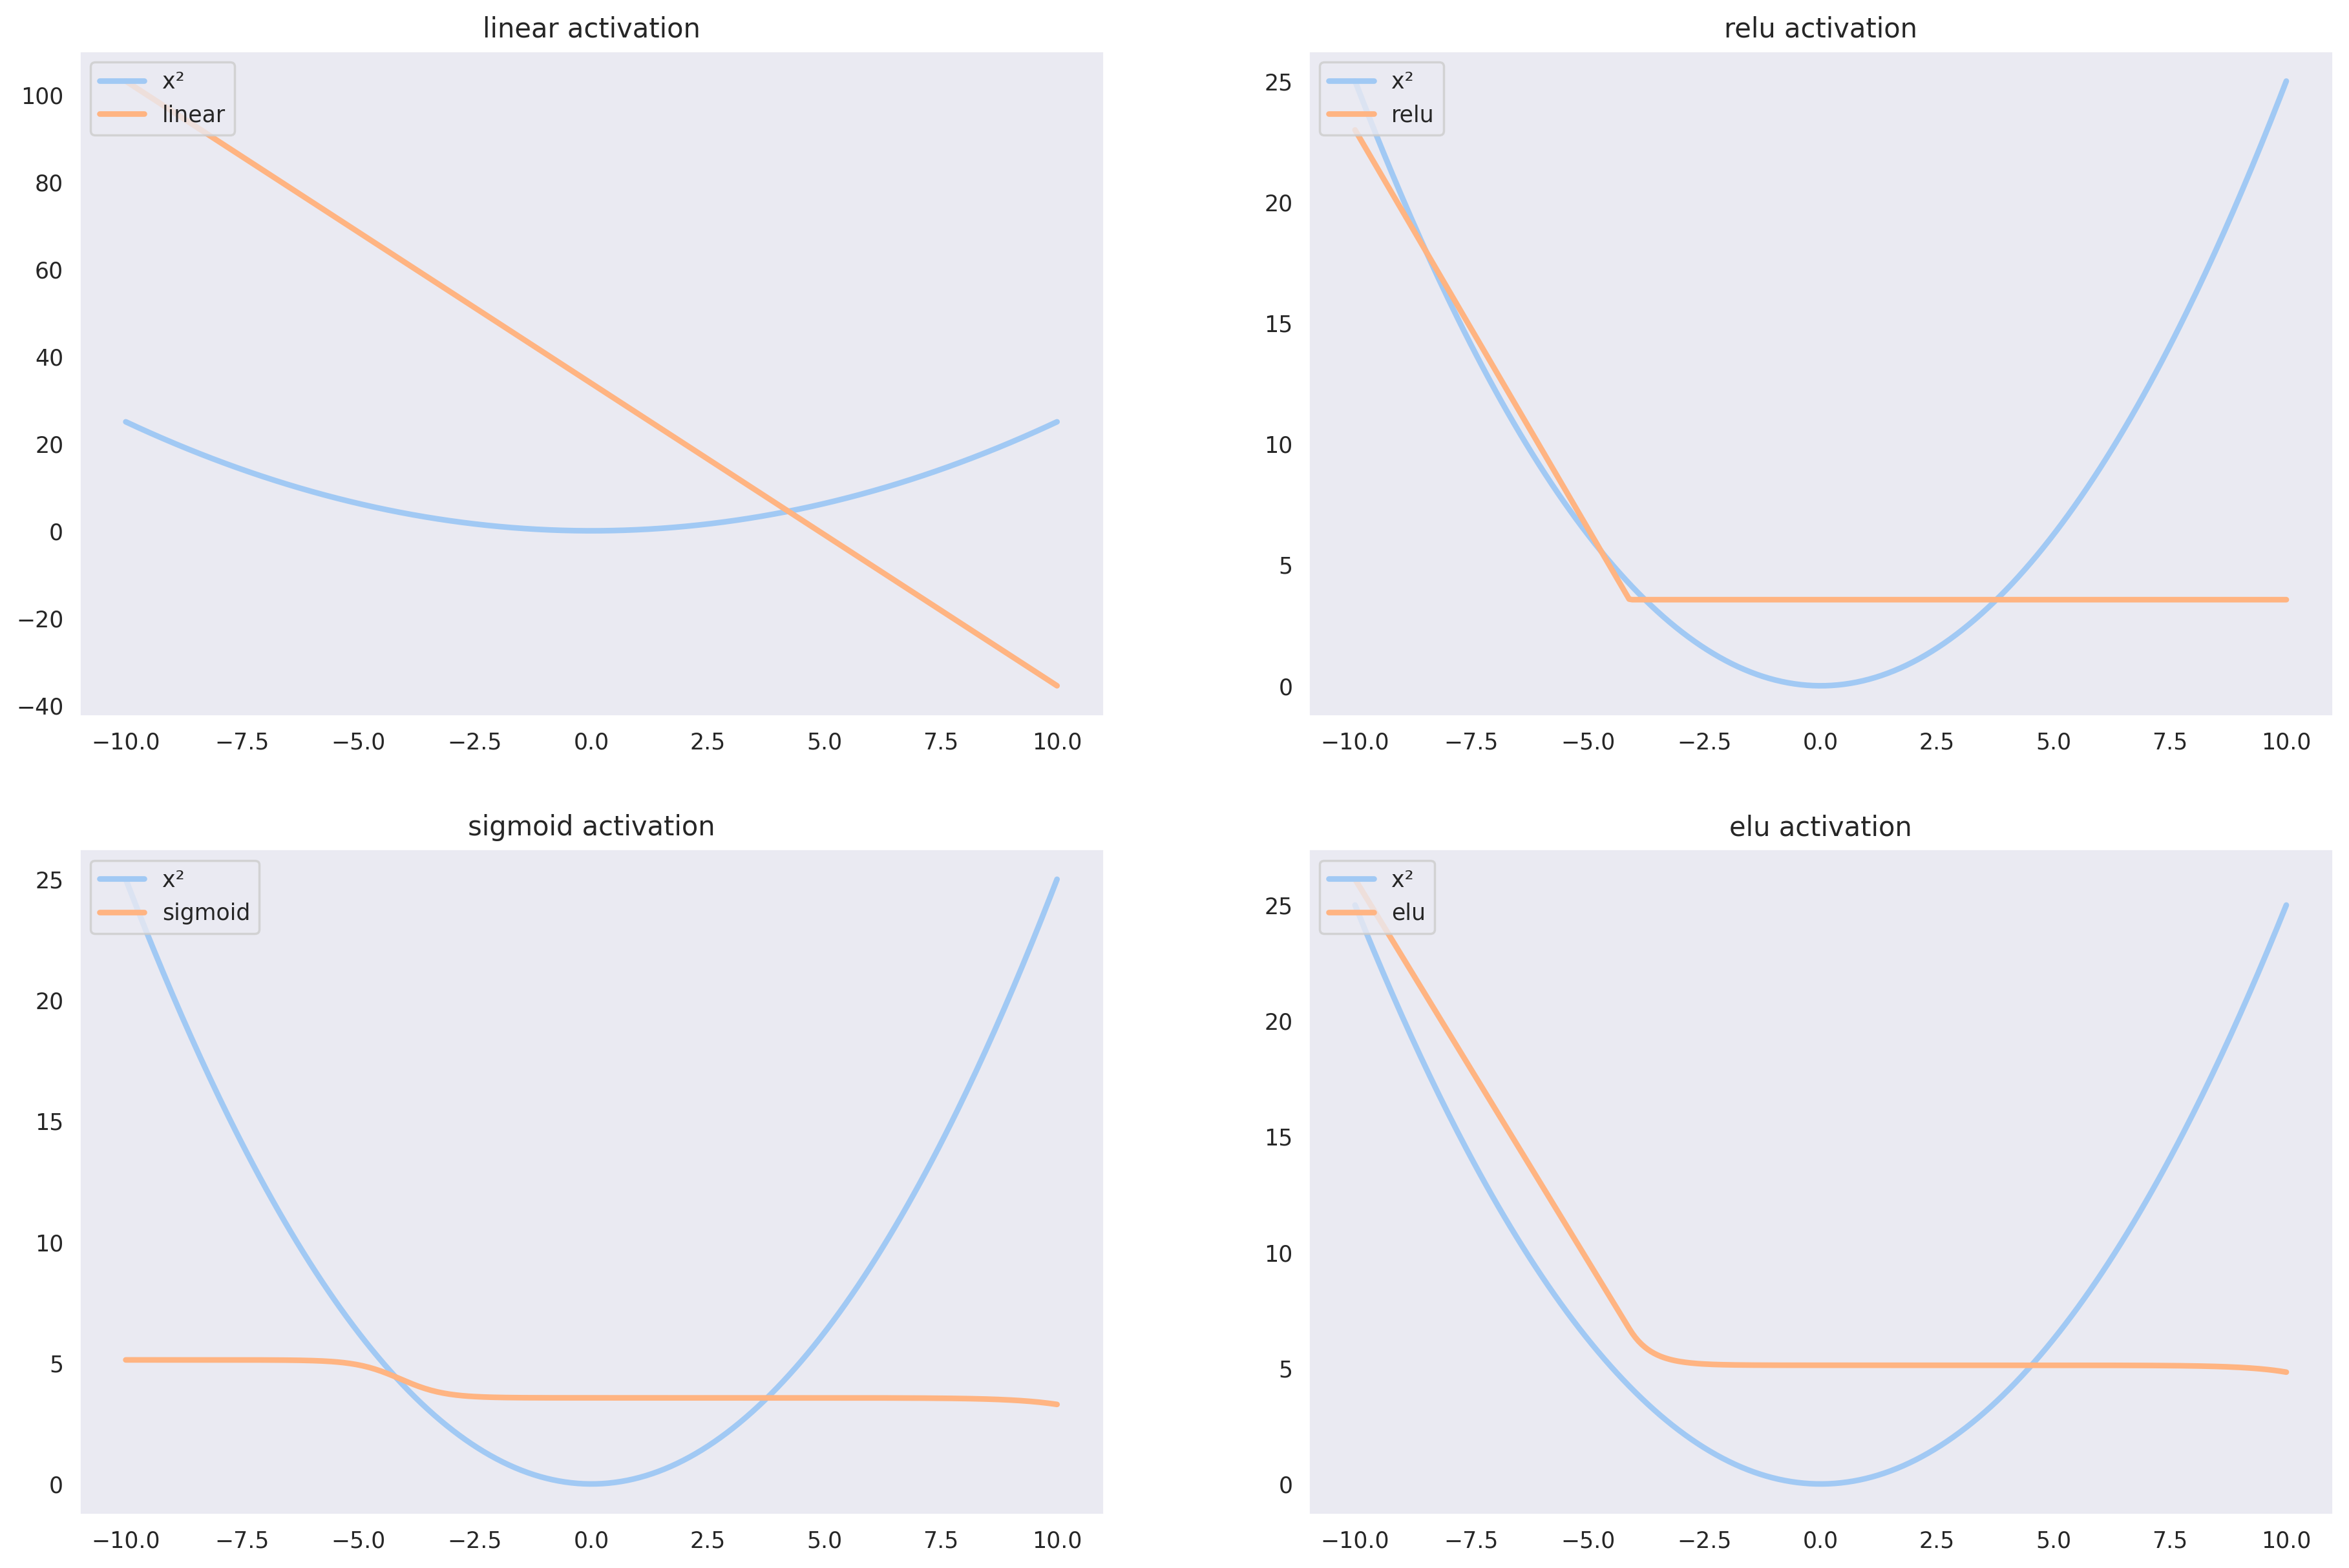

In [ ]:
# let's change the activation function in the model and see the results
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 12), dpi=250)
ax = ax.reshape(-1,)
for idx, act in enumerate(["linear", "relu", "sigmoid", "elu"]):
    # model with different activation
    dif_model = Sequential()
    dif_model.add(Input((1,)))
    dif_model.add(Dense(2, activation=act))
    dif_model.add(Dense(1, activation="linear"))
    dif_model.compile(optimizer=Adam(learning_rate=0.9), loss="mean_absolute_error",)
    dif_model.set_weights(nonlinear_model.get_weights())
    print(f"Model with {act} activation function results: {dif_model.evaluate(demo_x, demo_y)}")
    # let's plot the network as a function
    model_y = dif_model.predict(demo_x)
    ax[idx].plot(demo_x, demo_y, lw=2.5, c=sns.color_palette('pastel')[0], label="x²")
    ax[idx].plot(demo_x, model_y, lw=2.5, c=sns.color_palette('pastel')[1], label=f"{act}")
    ax[idx].set(title=f'{act} activation',)
    ax[idx].legend(loc=2)

---

## The Math Behind Neural Network Learning

Below code to produce visualizations used in the "The Math Behind Neural Network Learning" section

### Gradient Descent and Backpropagation

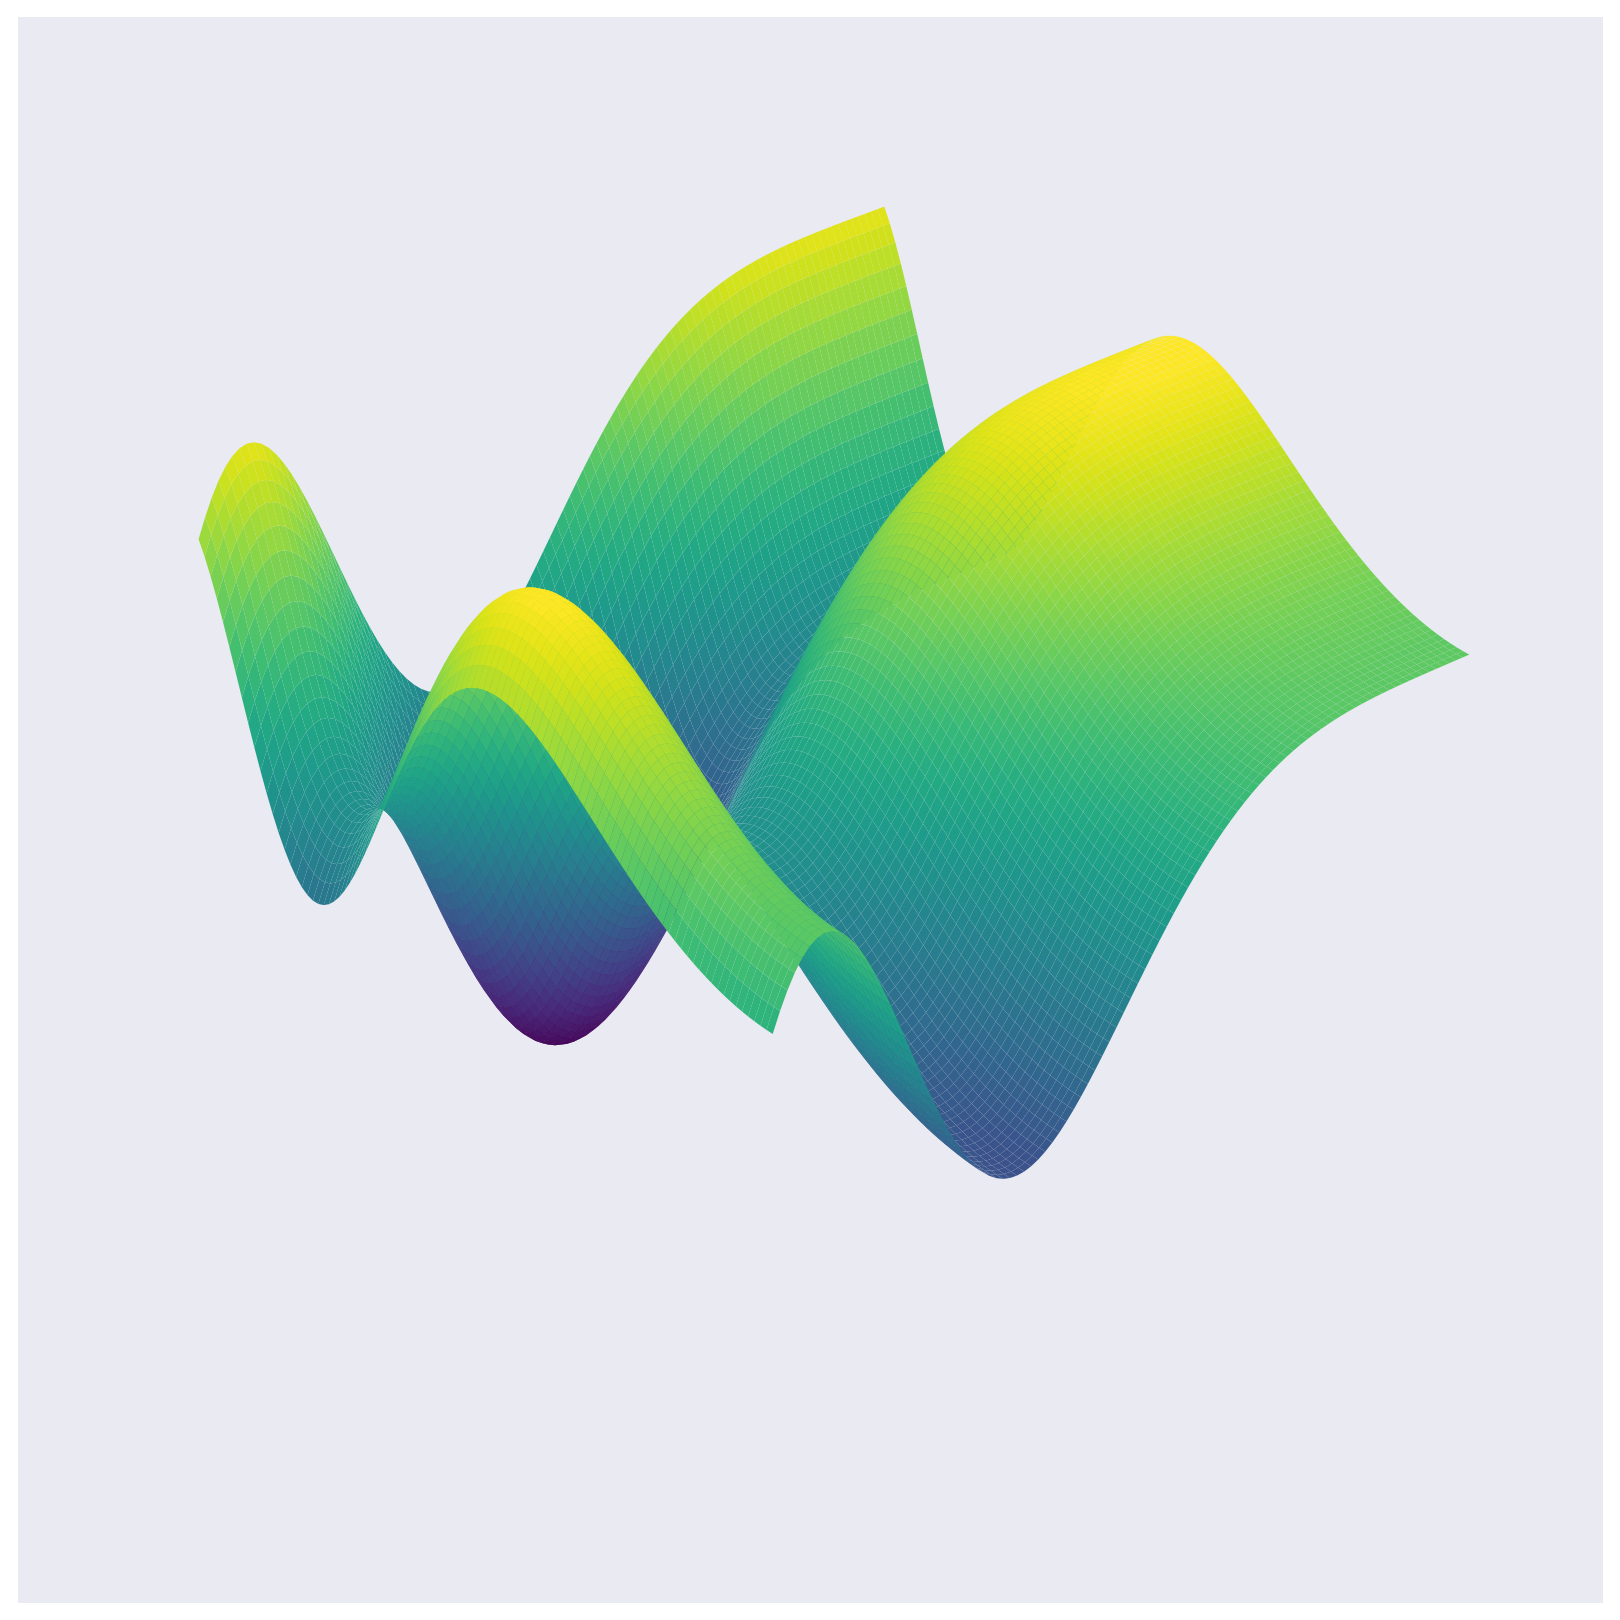

In [ ]:
# 3D Loss Landscape sample plot

from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot

def fun(x, y):
    return np.sin(x**2) + np.cos(y**2)

fig = plt.figure(figsize=(12, 12), dpi=175)
ax = plt.axes(projection='3d')
x = y = np.linspace(-2.7, 0, 100)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', rstride=1, cstride=1,)
ax.axis("off")
ax.view_init(azim=-40)

plt.show()

---

## Optimizers

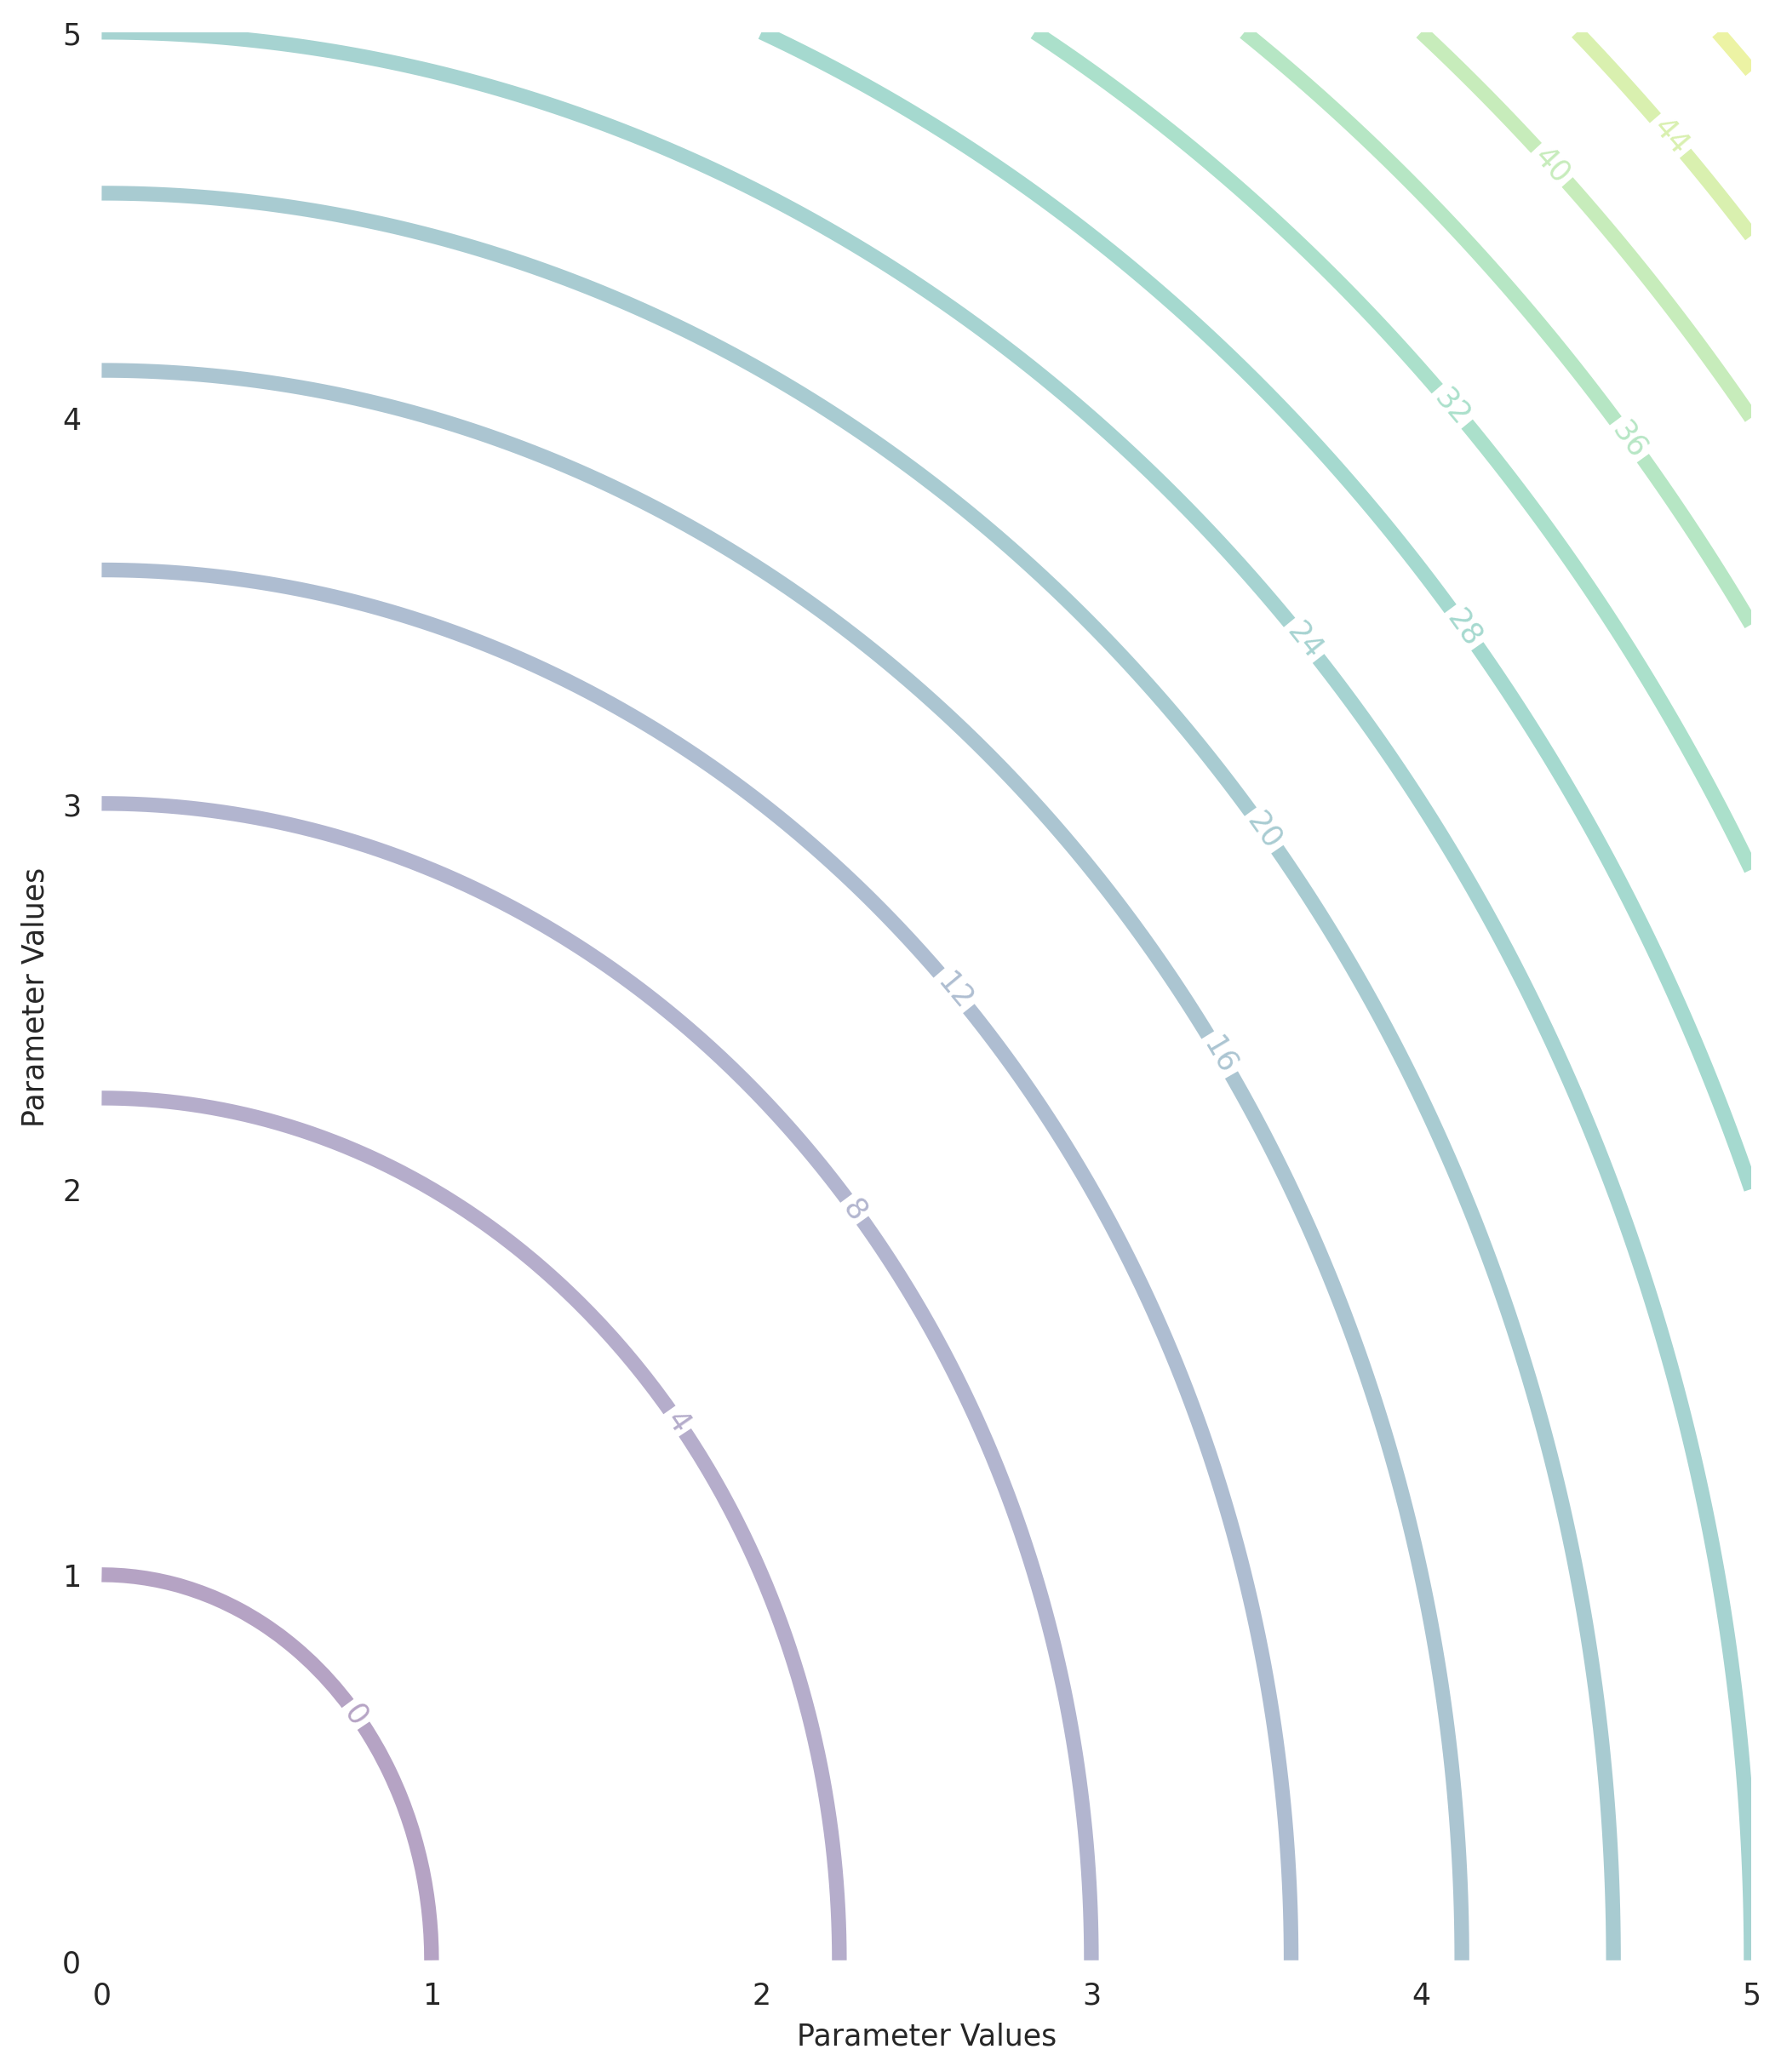

In [ ]:
# Simulated Loss Landscape with Contour Plot

sns.set_style('white')
def fun(x, y):
    return -(1-(x**2+y**2))

fig = plt.figure(figsize=(10, 12), dpi=250)
ax = plt.axes()
x = y = np.linspace(0, 5, 150)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y)))
Z = zs.reshape(X.shape)
cp = ax.contour(X, Y, Z, linewidths=5, cmap="viridis", levels=15, alpha=0.4)
ax.clabel(cp, inline=True, 
          fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_ylabel("Parameter Values")
ax.set_xlabel("Parameter Values")

plt.show()

---

## A Deeper Dive into Keras

We will explore deeper and more complex applications of Keras through examples 

In [ ]:
# we will further improve the network defined in the "Introduction to Keras" section
from keras.layers import Dense, Input
from keras.models import Sequential
fashion_model = Sequential()
fashion_model.add(Input((784,)))
fashion_model.add(Dense(64, activation="swish"))
fashion_model.add(Dense(64, activation="swish"))
fashion_model.add(Dense(10, activation="softmax"))

In [ ]:
from keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
fashion_model.compile(optimizer=Adam(learning_rate=1e-3),loss="sparse_categorical_crossentropy", metrics=["accuracy"])

fashion_model.fit(X_train, y_train, epochs=25, batch_size=1024)

fashion_model.evaluate(X_test, y_test, batch_size=2048)

Epoch 1/25
59/59 [==============================] - 0s 3ms/step - loss: 1.0138 - accuracy: 0.6555
Epoch 2/25
59/59 [==============================] - 0s 3ms/step - loss: 0.5172 - accuracy: 0.8216
Epoch 3/25
59/59 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.8420
Epoch 4/25
59/59 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.8517
Epoch 5/25
59/59 [==============================] - 0s 3ms/step - loss: 0.4035 - accuracy: 0.8595
Epoch 6/25
59/59 [==============================] - 0s 3ms/step - loss: 0.3904 - accuracy: 0.8634
Epoch 7/25
59/59 [==============================] - 0s 3ms/step - loss: 0.3793 - accuracy: 0.8670
Epoch 8/25
59/59 [==============================] - 0s 3ms/step - loss: 0.3637 - accuracy: 0.8717
Epoch 9/25
59/59 [==============================] - 0s 5ms/step - loss: 0.3563 - accuracy: 0.8740
Epoch 10/25
59/59 [==============================] - 0s 5ms/step - loss: 0.3456 - accuracy: 0.8764
Epoch 11/25
59/59 [

[0.3637543320655823, 0.8745999932289124]

### Training Callbacks and Validation

Epoch 1/40
59/59 [==============================] - 1s 6ms/step - loss: 1.0181 - accuracy: 0.6705 - val_loss: 0.5987 - val_accuracy: 0.7993
Epoch 2/40
59/59 [==============================] - 0s 4ms/step - loss: 0.5238 - accuracy: 0.8212 - val_loss: 0.5034 - val_accuracy: 0.8256
Epoch 3/40
59/59 [==============================] - 0s 5ms/step - loss: 0.4621 - accuracy: 0.8406 - val_loss: 0.4689 - val_accuracy: 0.8335
Epoch 4/40
59/59 [==============================] - 0s 4ms/step - loss: 0.4289 - accuracy: 0.8512 - val_loss: 0.4561 - val_accuracy: 0.8388
Epoch 5/40
59/59 [==============================] - 0s 4ms/step - loss: 0.4115 - accuracy: 0.8576 - val_loss: 0.4380 - val_accuracy: 0.8449
Epoch 6/40
59/59 [==============================] - 0s 5ms/step - loss: 0.3933 - accuracy: 0.8626 - val_loss: 0.4173 - val_accuracy: 0.8521
Epoch 7/40
59/59 [==============================] - 0s 4ms/step - loss: 0.3803 - accuracy: 0.8657 - val_loss: 0.4131 - val_accuracy: 0.8552
Epoch 8/40
59/59 [==

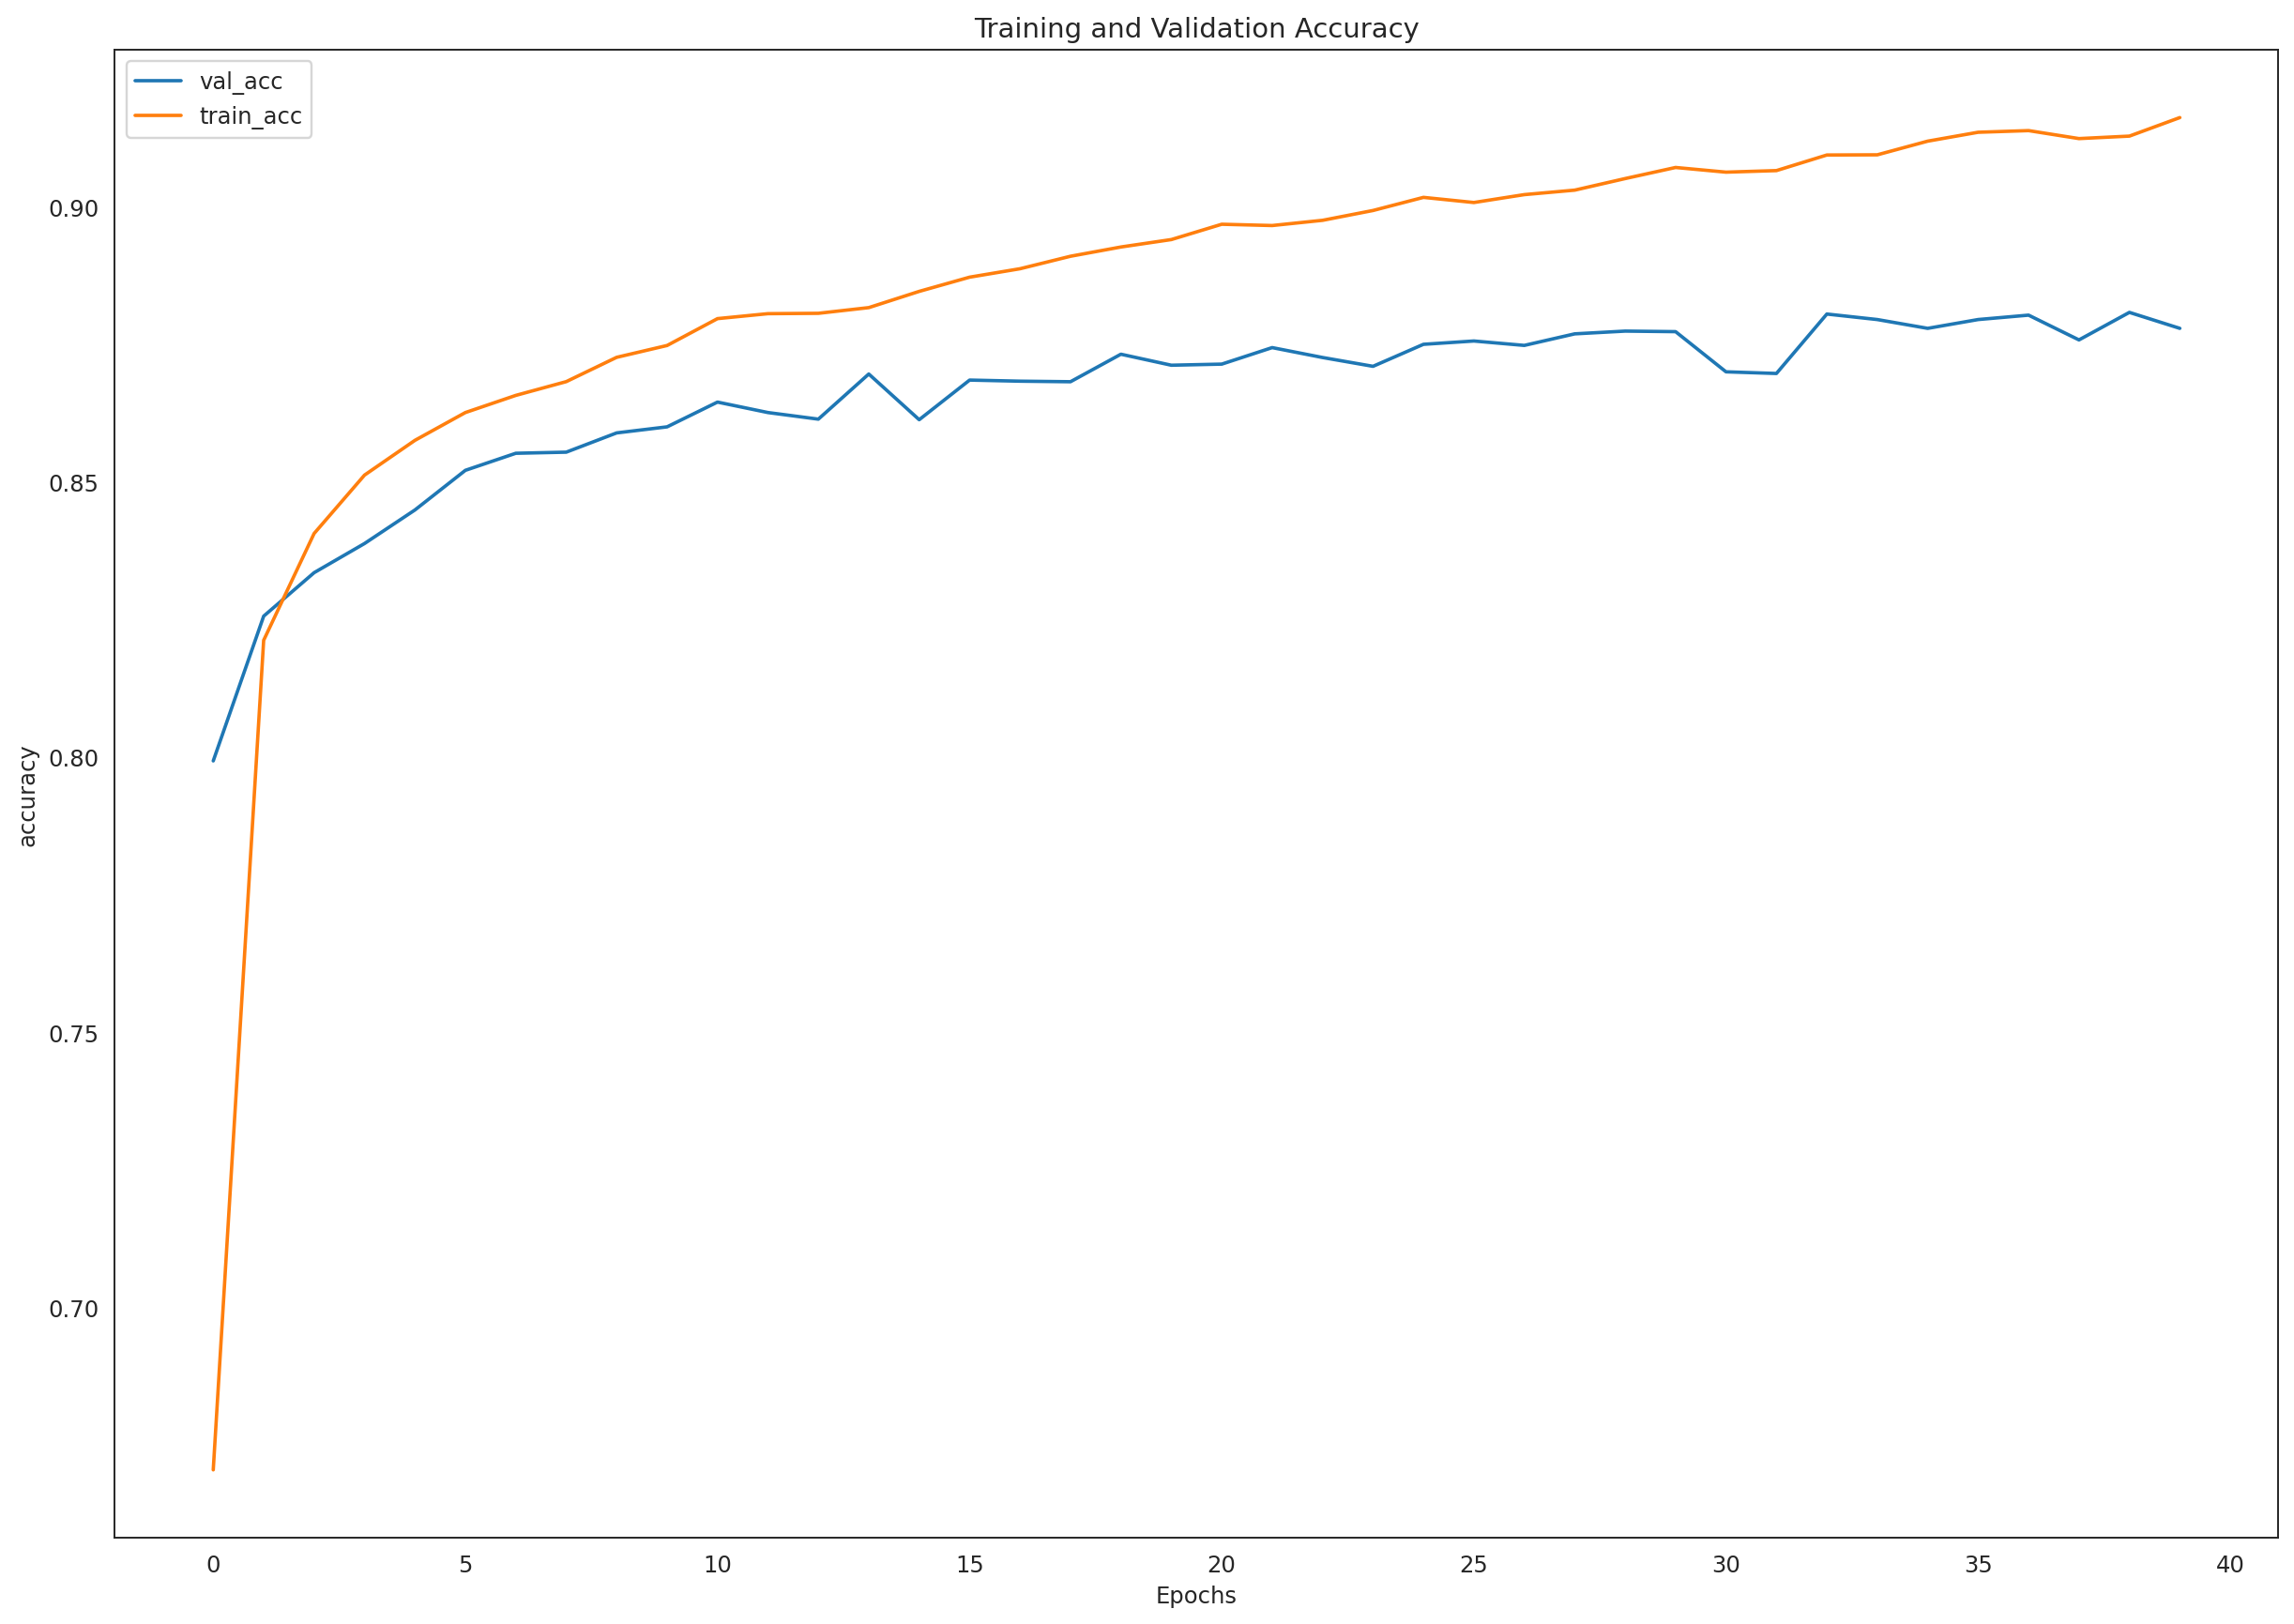

In [ ]:
# redefine the model
fashion_model = Sequential()
fashion_model.add(Input((784,)))
fashion_model.add(Dense(64, activation="swish"))
fashion_model.add(Dense(64, activation="swish"))
fashion_model.add(Dense(10, activation="softmax"))
# compile again so the model restarts training progress from above
fashion_model.compile(optimizer=Adam(learning_rate=1e-3),loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# history and plotting
history = fashion_model.fit(X_train, y_train, epochs=40, batch_size=1024, validation_data=(X_test, y_test))
plt.figure(figsize=(17, 12), dpi=175)
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.plot(history.history['accuracy'], label="train_acc")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

Epoch 1/100
59/59 [==============================] - 1s 7ms/step - loss: 0.9561 - accuracy: 0.6864 - val_loss: 0.6080 - val_accuracy: 0.7888

Epoch 00001: val_accuracy improved from -inf to 0.78880, saving model to path_to_weights
Epoch 2/100
59/59 [==============================] - 0s 4ms/step - loss: 0.5226 - accuracy: 0.8207 - val_loss: 0.5102 - val_accuracy: 0.8192

Epoch 00002: val_accuracy improved from 0.78880 to 0.81920, saving model to path_to_weights
Epoch 3/100
59/59 [==============================] - 0s 4ms/step - loss: 0.4587 - accuracy: 0.8408 - val_loss: 0.4689 - val_accuracy: 0.8327

Epoch 00003: val_accuracy improved from 0.81920 to 0.83270, saving model to path_to_weights
Epoch 4/100
59/59 [==============================] - 0s 4ms/step - loss: 0.4264 - accuracy: 0.8524 - val_loss: 0.4439 - val_accuracy: 0.8454

Epoch 00004: val_accuracy improved from 0.83270 to 0.84540, saving model to path_to_weights
Epoch 5/100
59/59 [==============================] - 0s 4ms/step - 

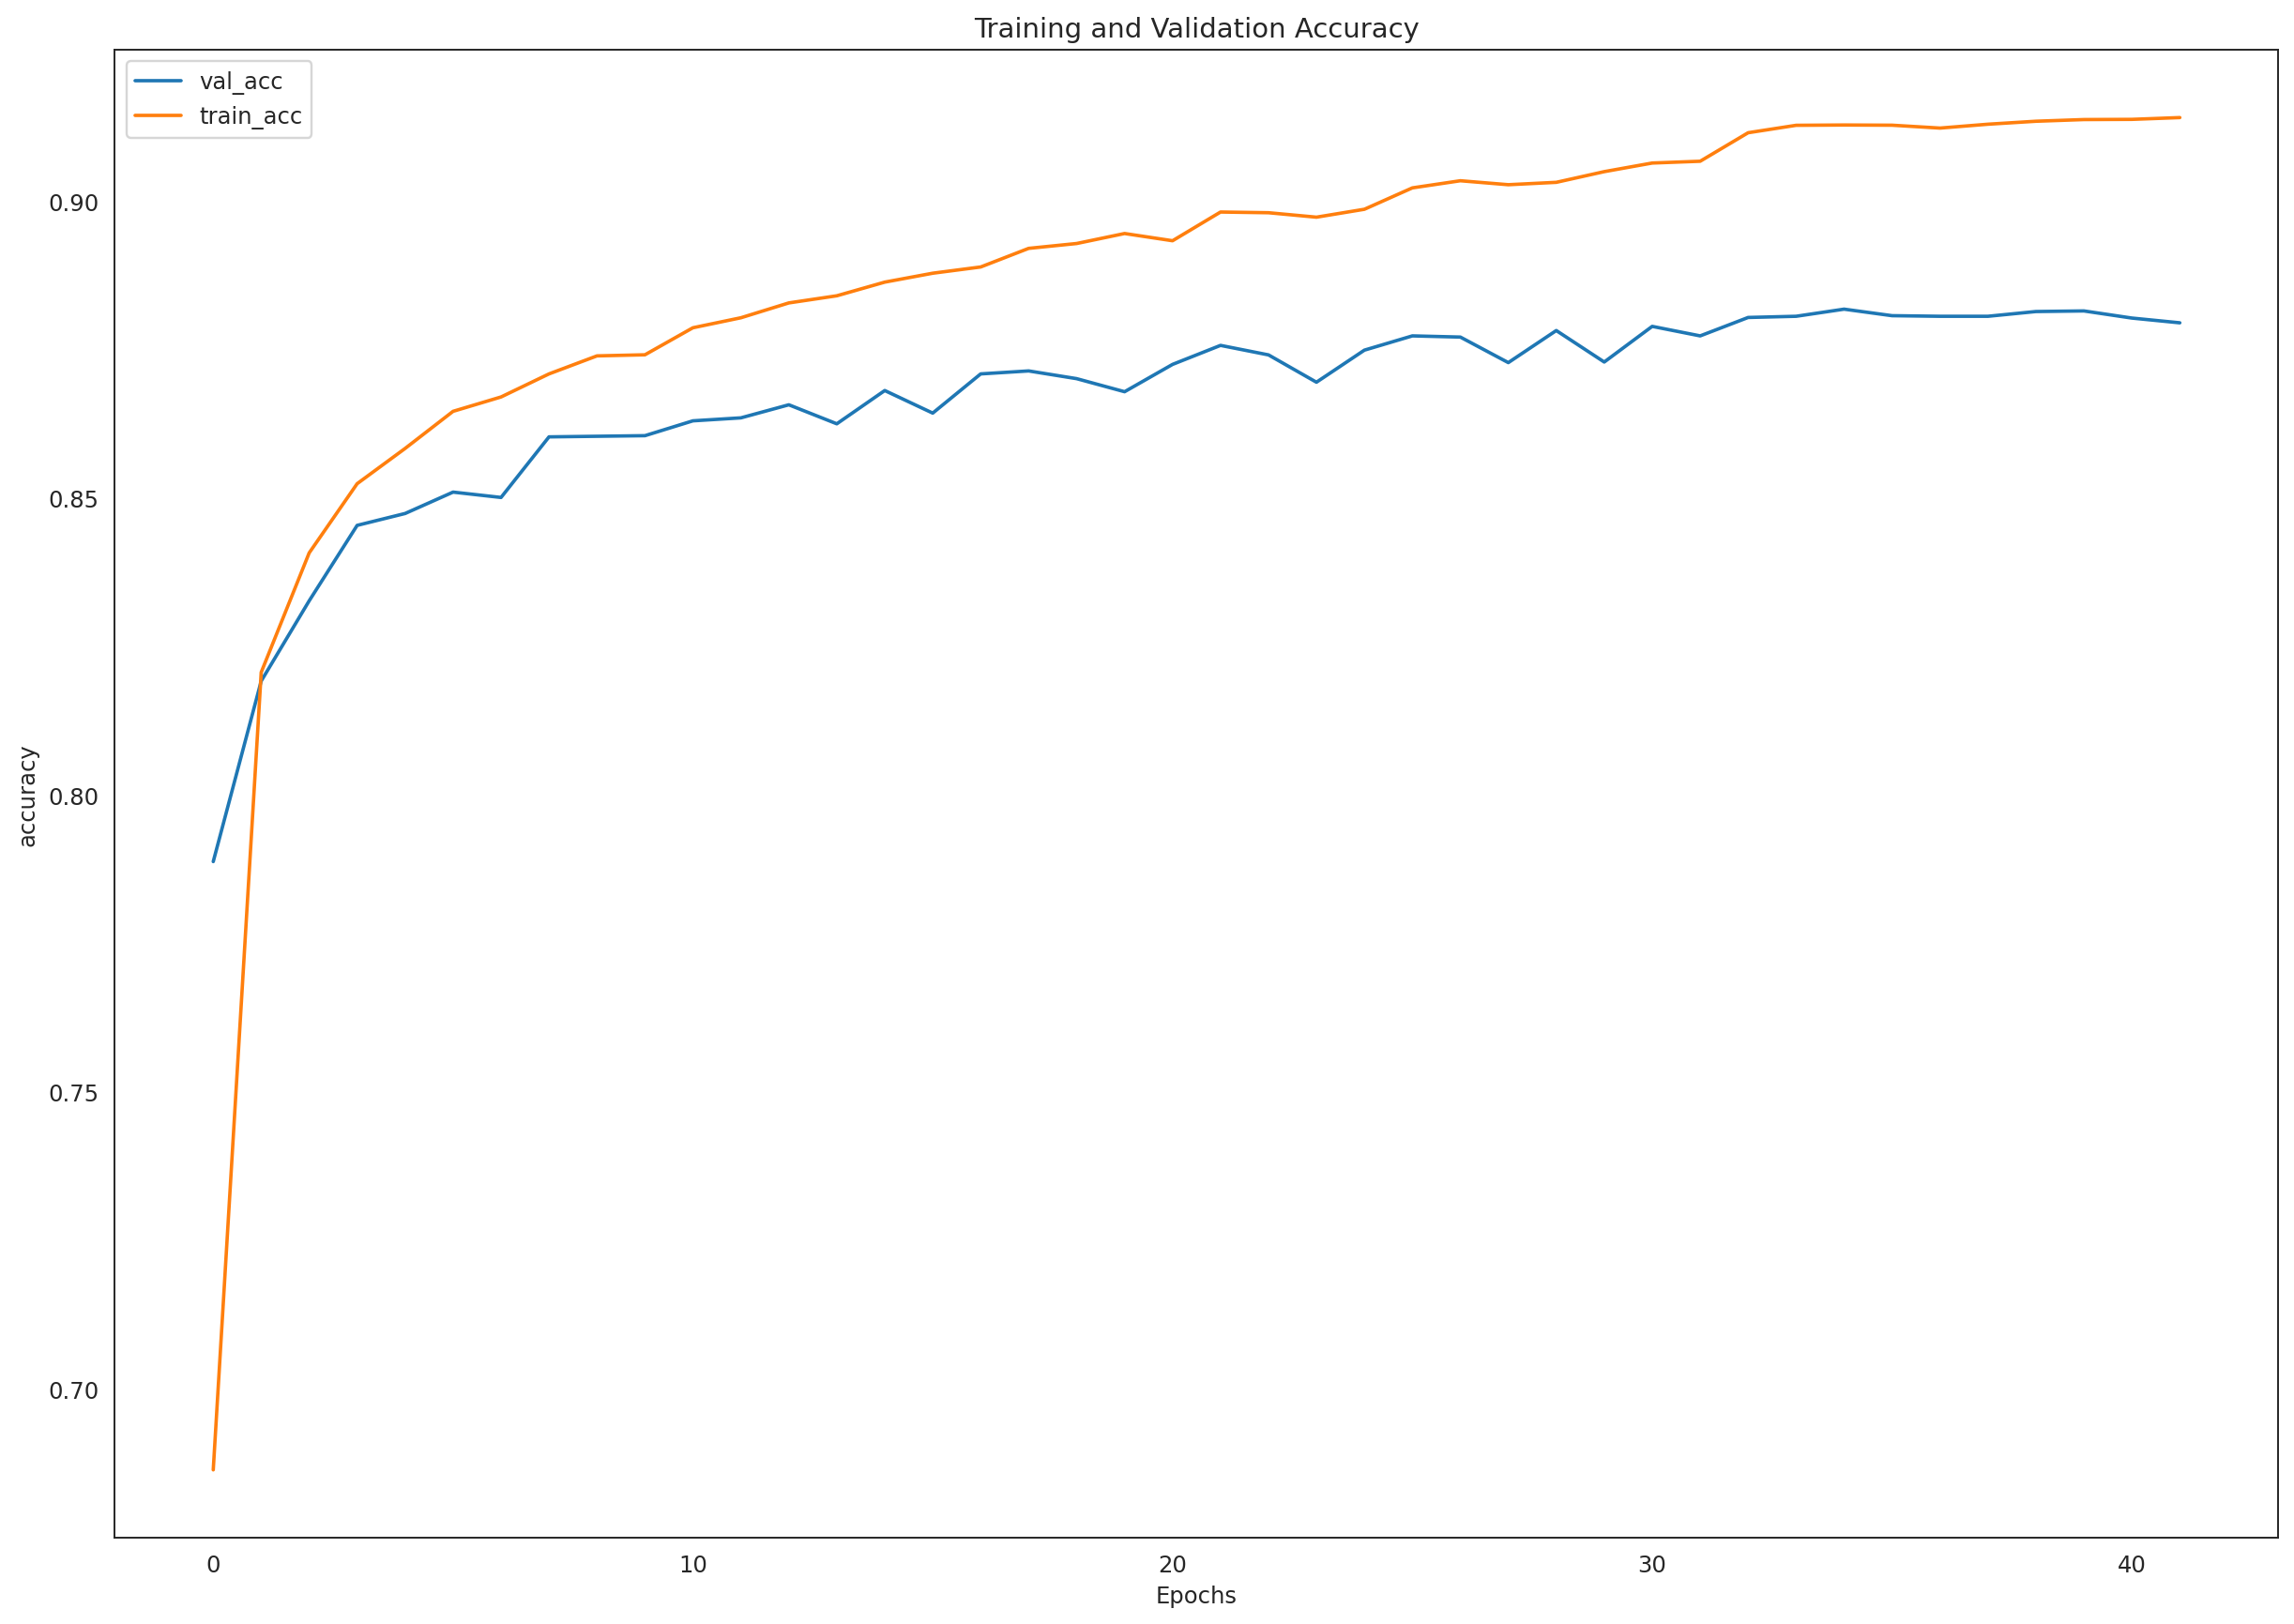

In [ ]:
# callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

checkpoint = ModelCheckpoint(filepath="path_to_weights", monitor="val_accuracy", 
                             save_weights_only=True, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=7, monitor="val_accuracy", 
                          min_delta=1e-7, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.15,
                              patience=5, min_lr=1e-7, verbose=1)

# redefine the model
fashion_model = Sequential()
fashion_model.add(Input((784,)))
fashion_model.add(Dense(64, activation="swish"))
fashion_model.add(Dense(64, activation="swish"))
fashion_model.add(Dense(10, activation="softmax"))
# compile again so the model restarts training progress from above
fashion_model.compile(optimizer=Adam(learning_rate=1e-3),loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = fashion_model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop, reduce_lr])

plt.figure(dpi=175, figsize=(17, 12))
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.plot(history.history['accuracy'], label="train_acc")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

### Batch Normalization and Dropouts

Epoch 1/100
59/59 [==============================] - 1s 8ms/step - loss: 0.7131 - accuracy: 0.7621 - val_loss: 1.2809 - val_accuracy: 0.7264

Epoch 00001: val_accuracy improved from -inf to 0.72640, saving model to path_to_weights
Epoch 2/100
59/59 [==============================] - 0s 5ms/step - loss: 0.4312 - accuracy: 0.8518 - val_loss: 0.9250 - val_accuracy: 0.8076

Epoch 00002: val_accuracy improved from 0.72640 to 0.80760, saving model to path_to_weights
Epoch 3/100
59/59 [==============================] - 0s 5ms/step - loss: 0.3805 - accuracy: 0.8666 - val_loss: 0.6846 - val_accuracy: 0.8274

Epoch 00003: val_accuracy improved from 0.80760 to 0.82740, saving model to path_to_weights
Epoch 4/100
59/59 [==============================] - 0s 5ms/step - loss: 0.3515 - accuracy: 0.8764 - val_loss: 0.5170 - val_accuracy: 0.8503

Epoch 00004: val_accuracy improved from 0.82740 to 0.85030, saving model to path_to_weights
Epoch 5/100
59/59 [==============================] - 0s 5ms/step - 

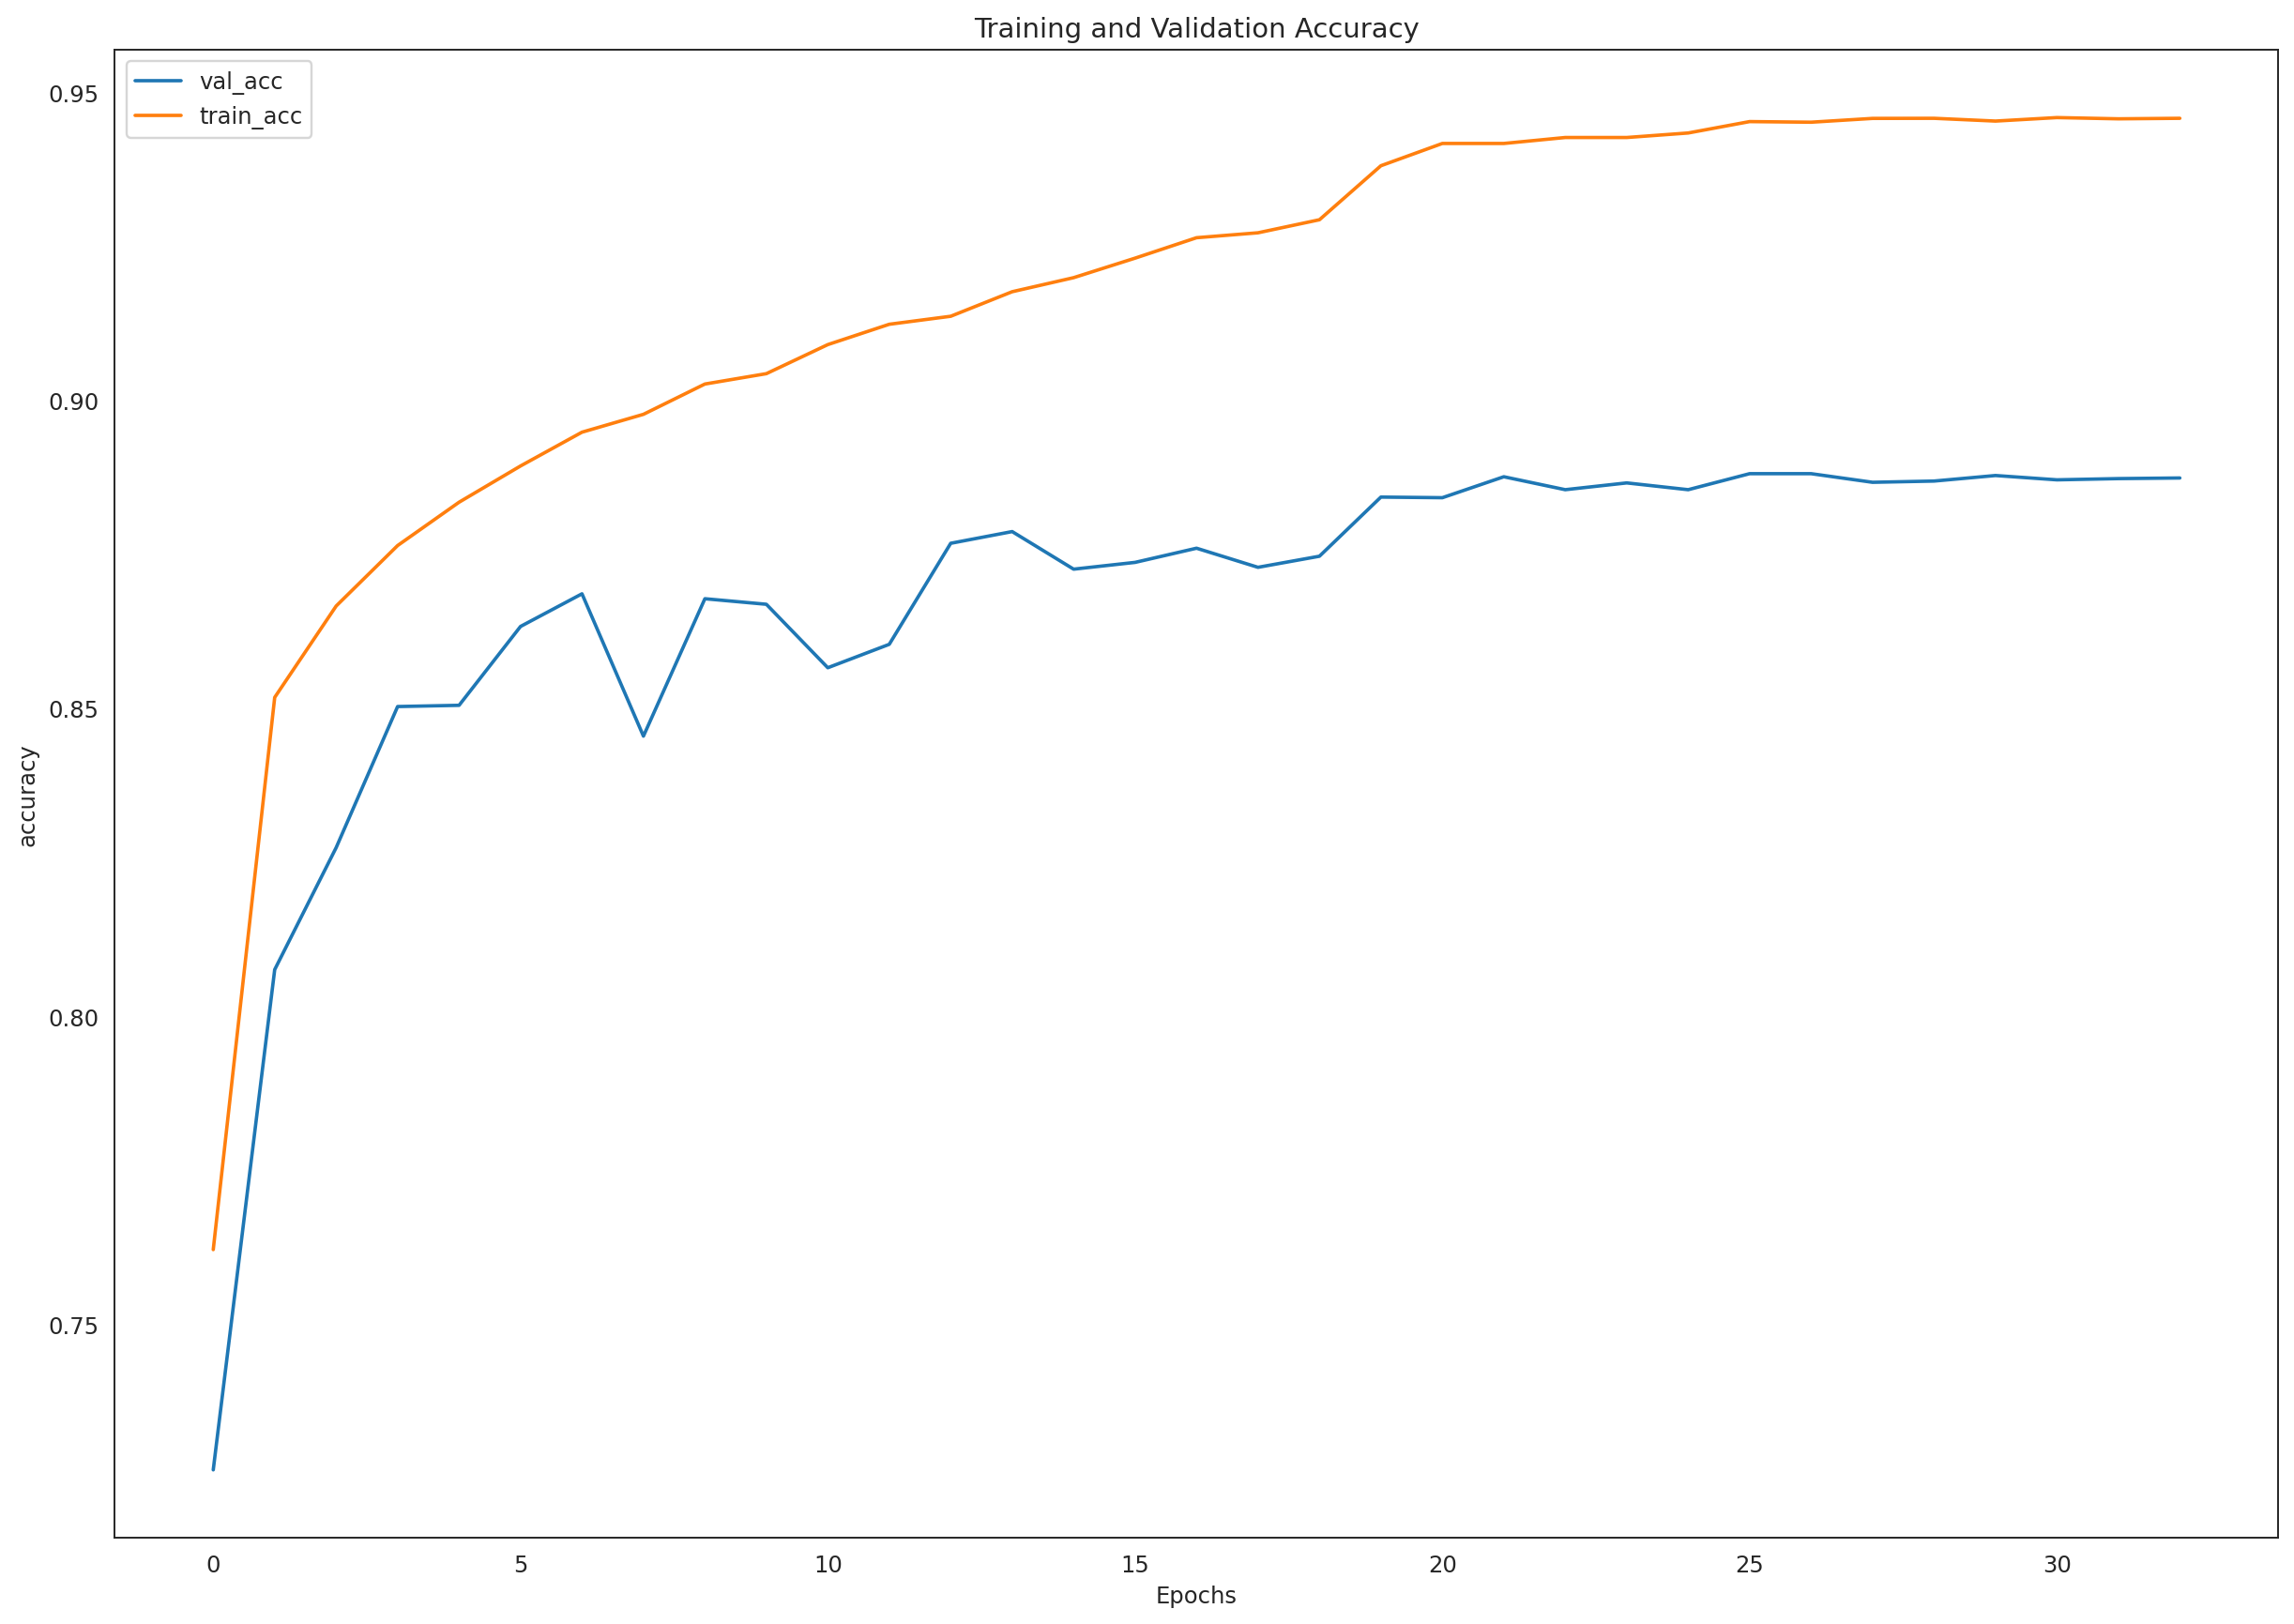

In [ ]:
# callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# batch norm
from tensorflow.keras.layers import BatchNormalization

checkpoint = ModelCheckpoint(filepath="path_to_weights", monitor="val_accuracy", 
                             save_weights_only=True, save_best_only=True, verbose=1)
early_stop = EarlyStopping(patience=7, monitor="val_accuracy", 
                          min_delta=1e-7, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.15,
                              patience=5, min_lr=1e-7, verbose=1)

# redefine the model
fashion_model = Sequential()
fashion_model.add(Input((784,)))
fashion_model.add(Dense(64, activation="swish"))
fashion_model.add(BatchNormalization())
fashion_model.add(Dense(64, activation="swish"))
fashion_model.add(BatchNormalization())
fashion_model.add(Dense(10, activation="softmax"))
# compile again so the model restarts training progress from above
fashion_model.compile(optimizer=Adam(learning_rate=1e-3),loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = fashion_model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stop, reduce_lr])

plt.figure(dpi=175, figsize=(17, 12))
plt.plot(history.history['val_accuracy'], label="val_acc")
plt.plot(history.history['accuracy'], label="train_acc")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()

### Universal Approximation Theorem

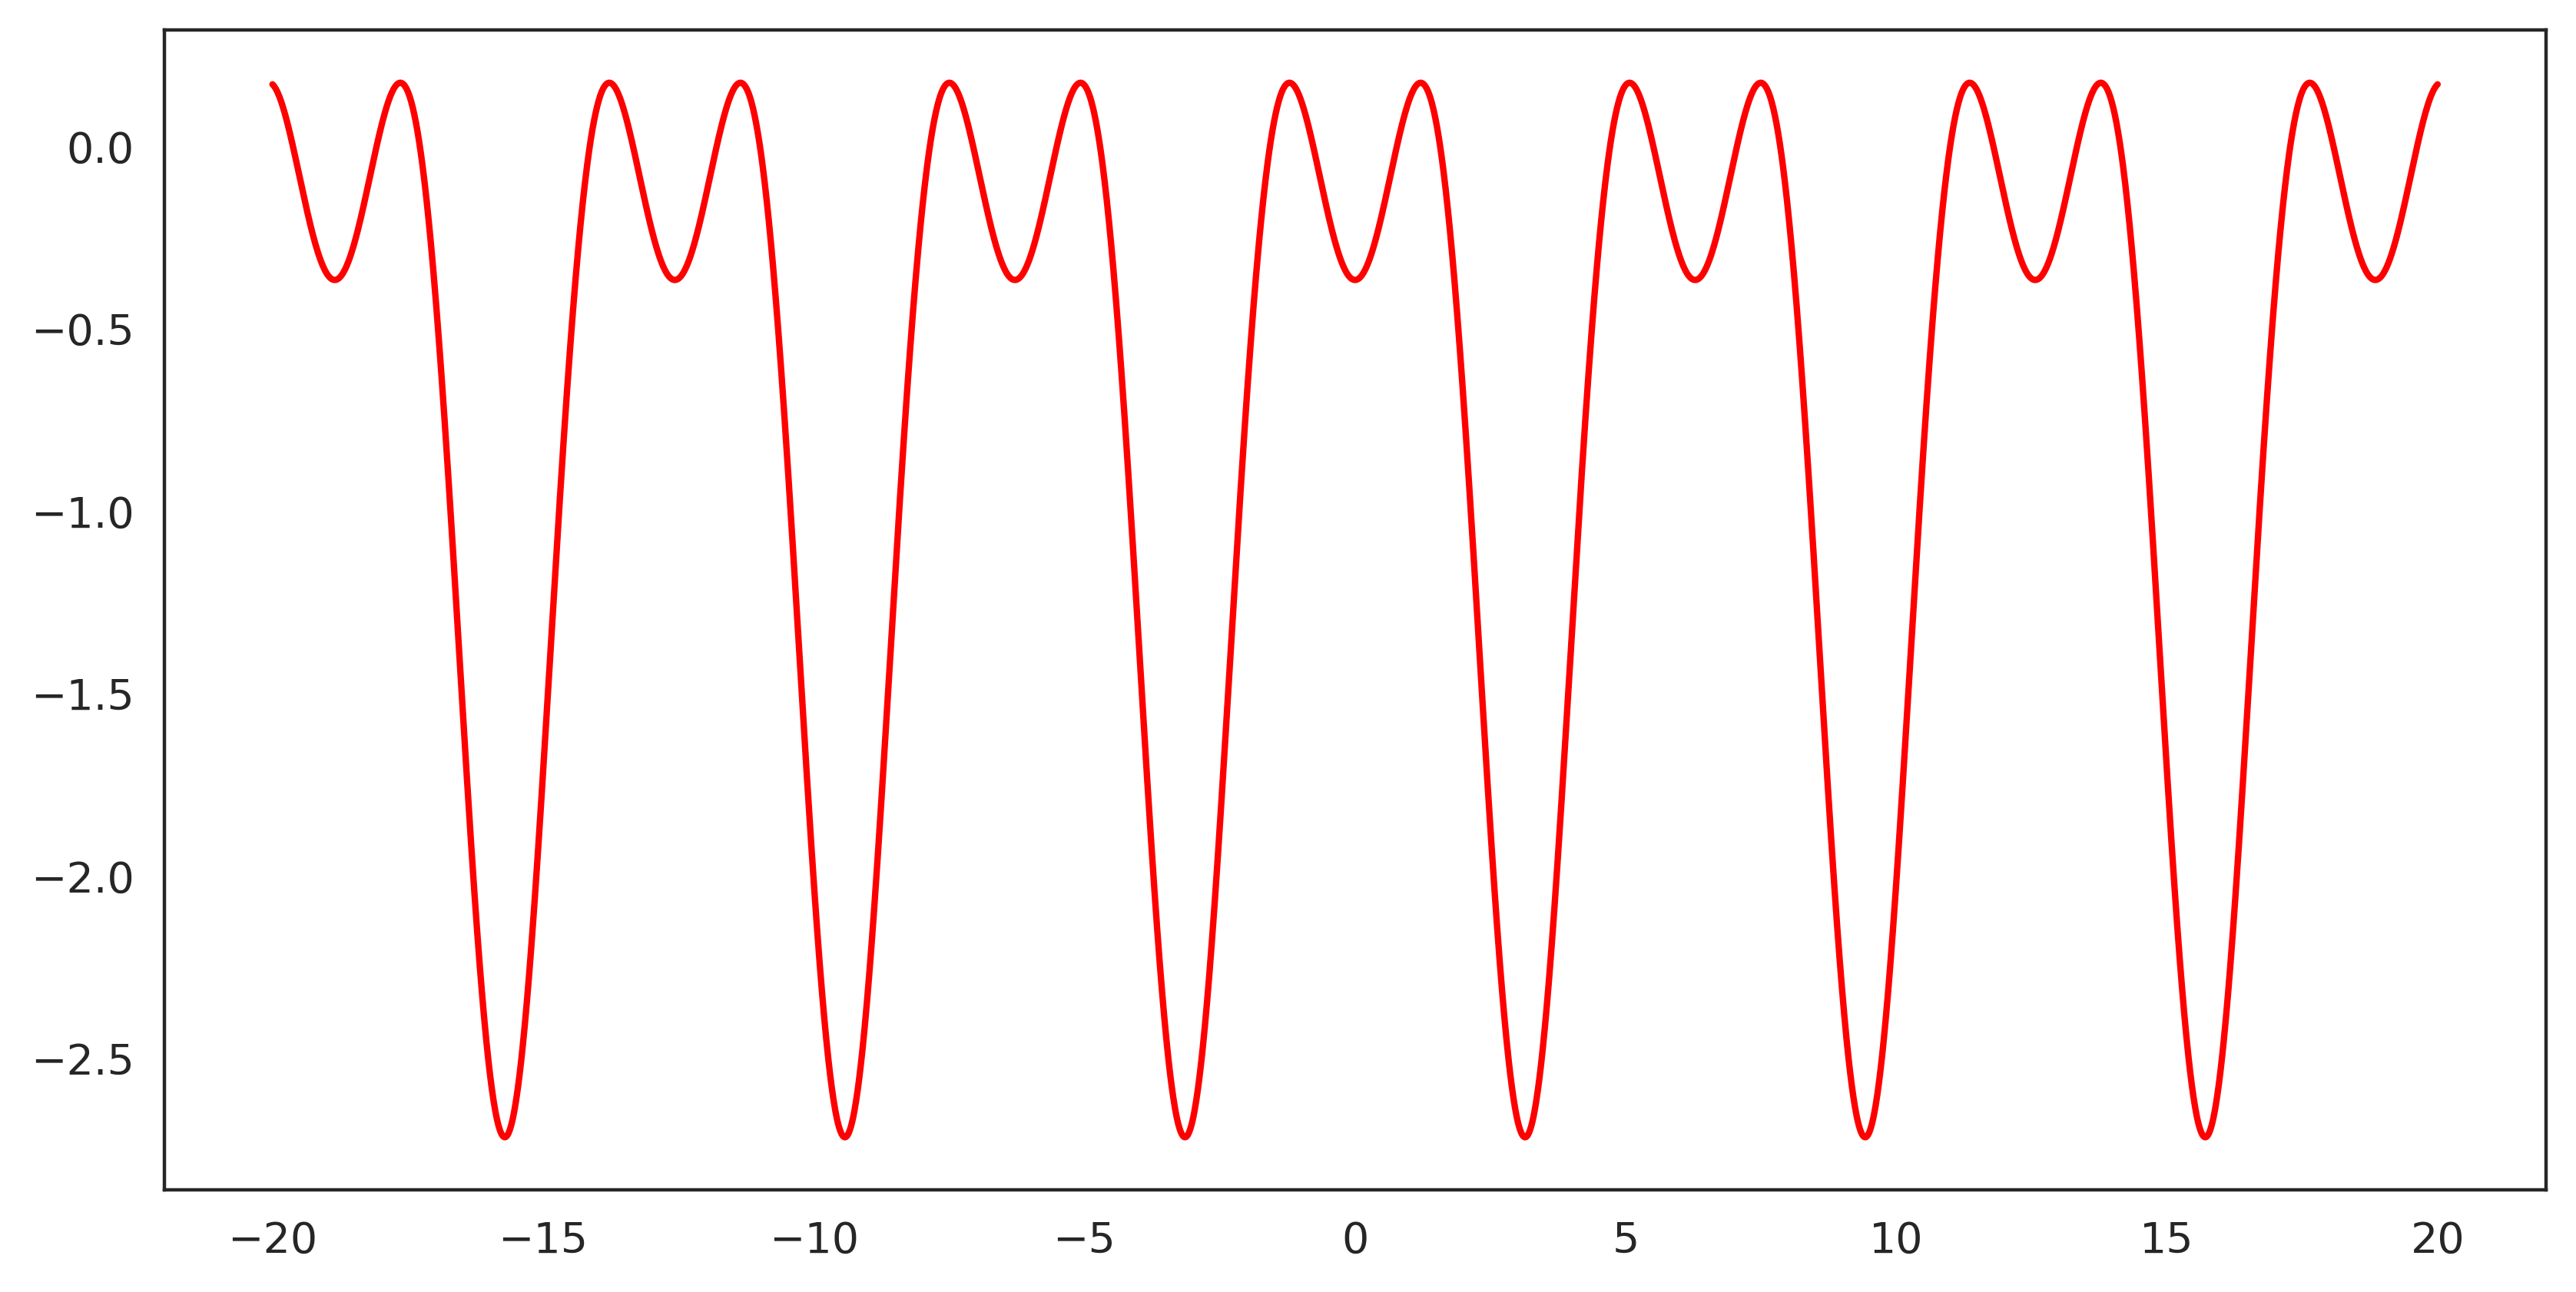

In [ ]:
def function(x):
    return np.sin(x)**2 - np.exp(-np.cos(x))

x = np.linspace(-20, 20, 4000)
y = function(x)

plt.figure(figsize=(10, 5), dpi=400)
plt.plot(x, y, color='red')
plt.show()

In [ ]:
from keras import layers as L
def UAT_generator(n, layers, activation):
    model = tensorflow.keras.models.Sequential()
    model.add(L.Input(1,))
    for i in range(layers):
        model.add(L.Dense(n, activation=activation))
    model.add(L.Dense(1, activation='linear'))
    return model

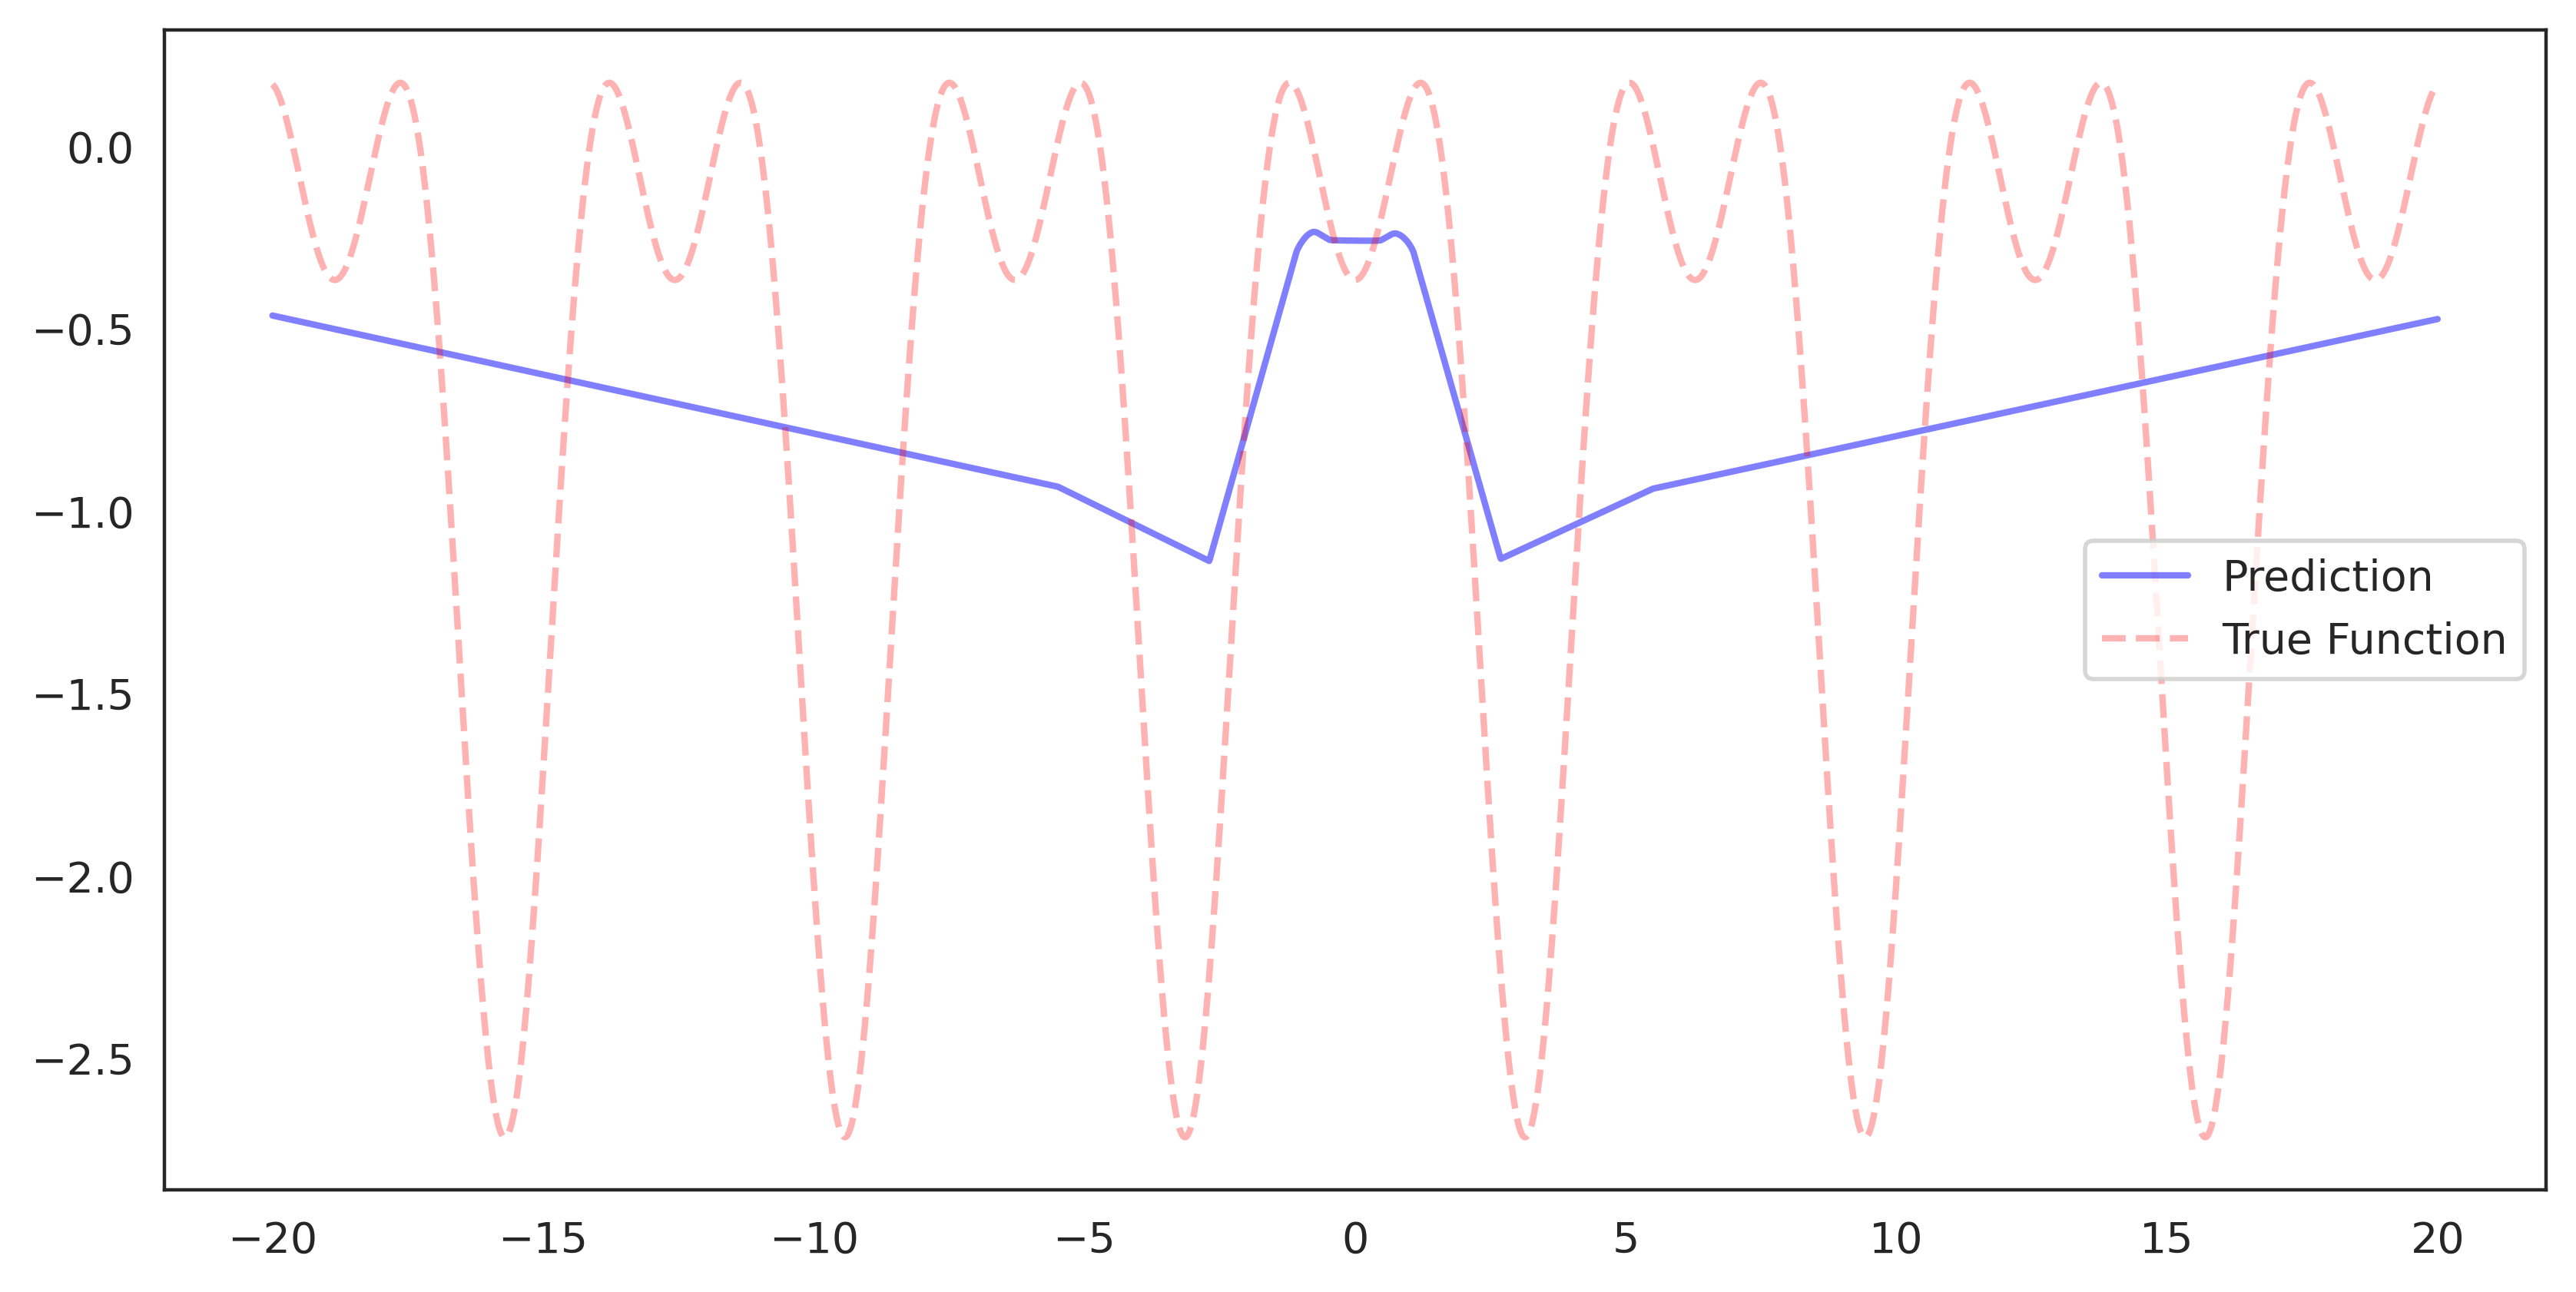

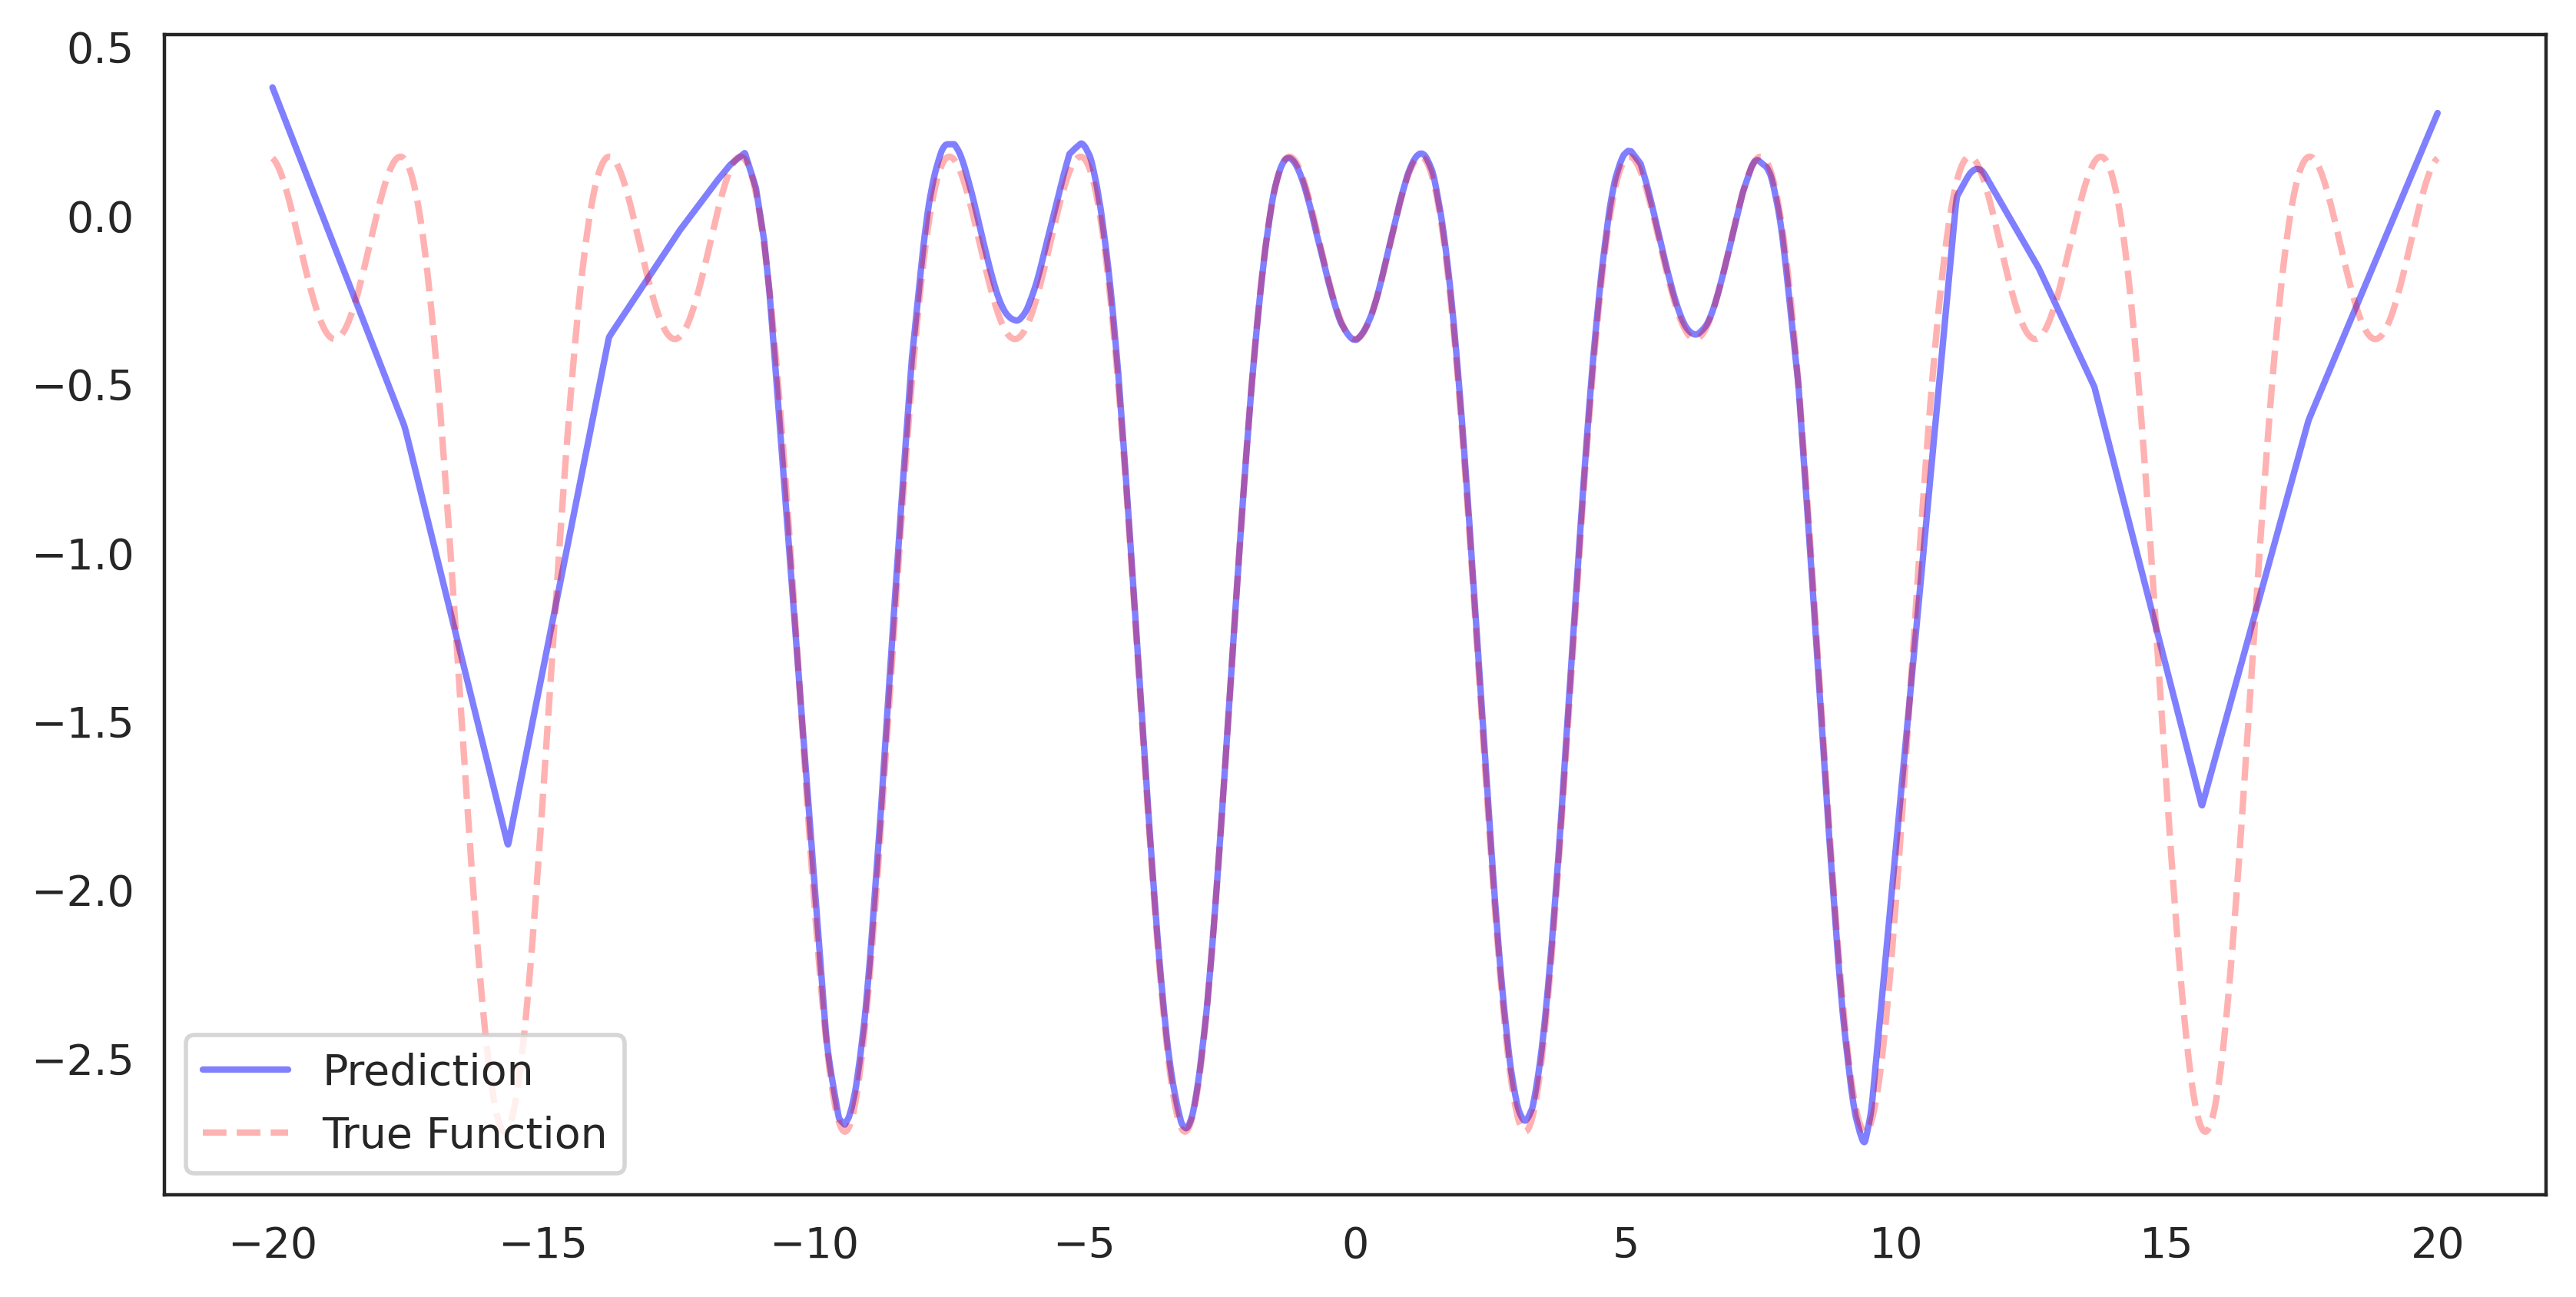

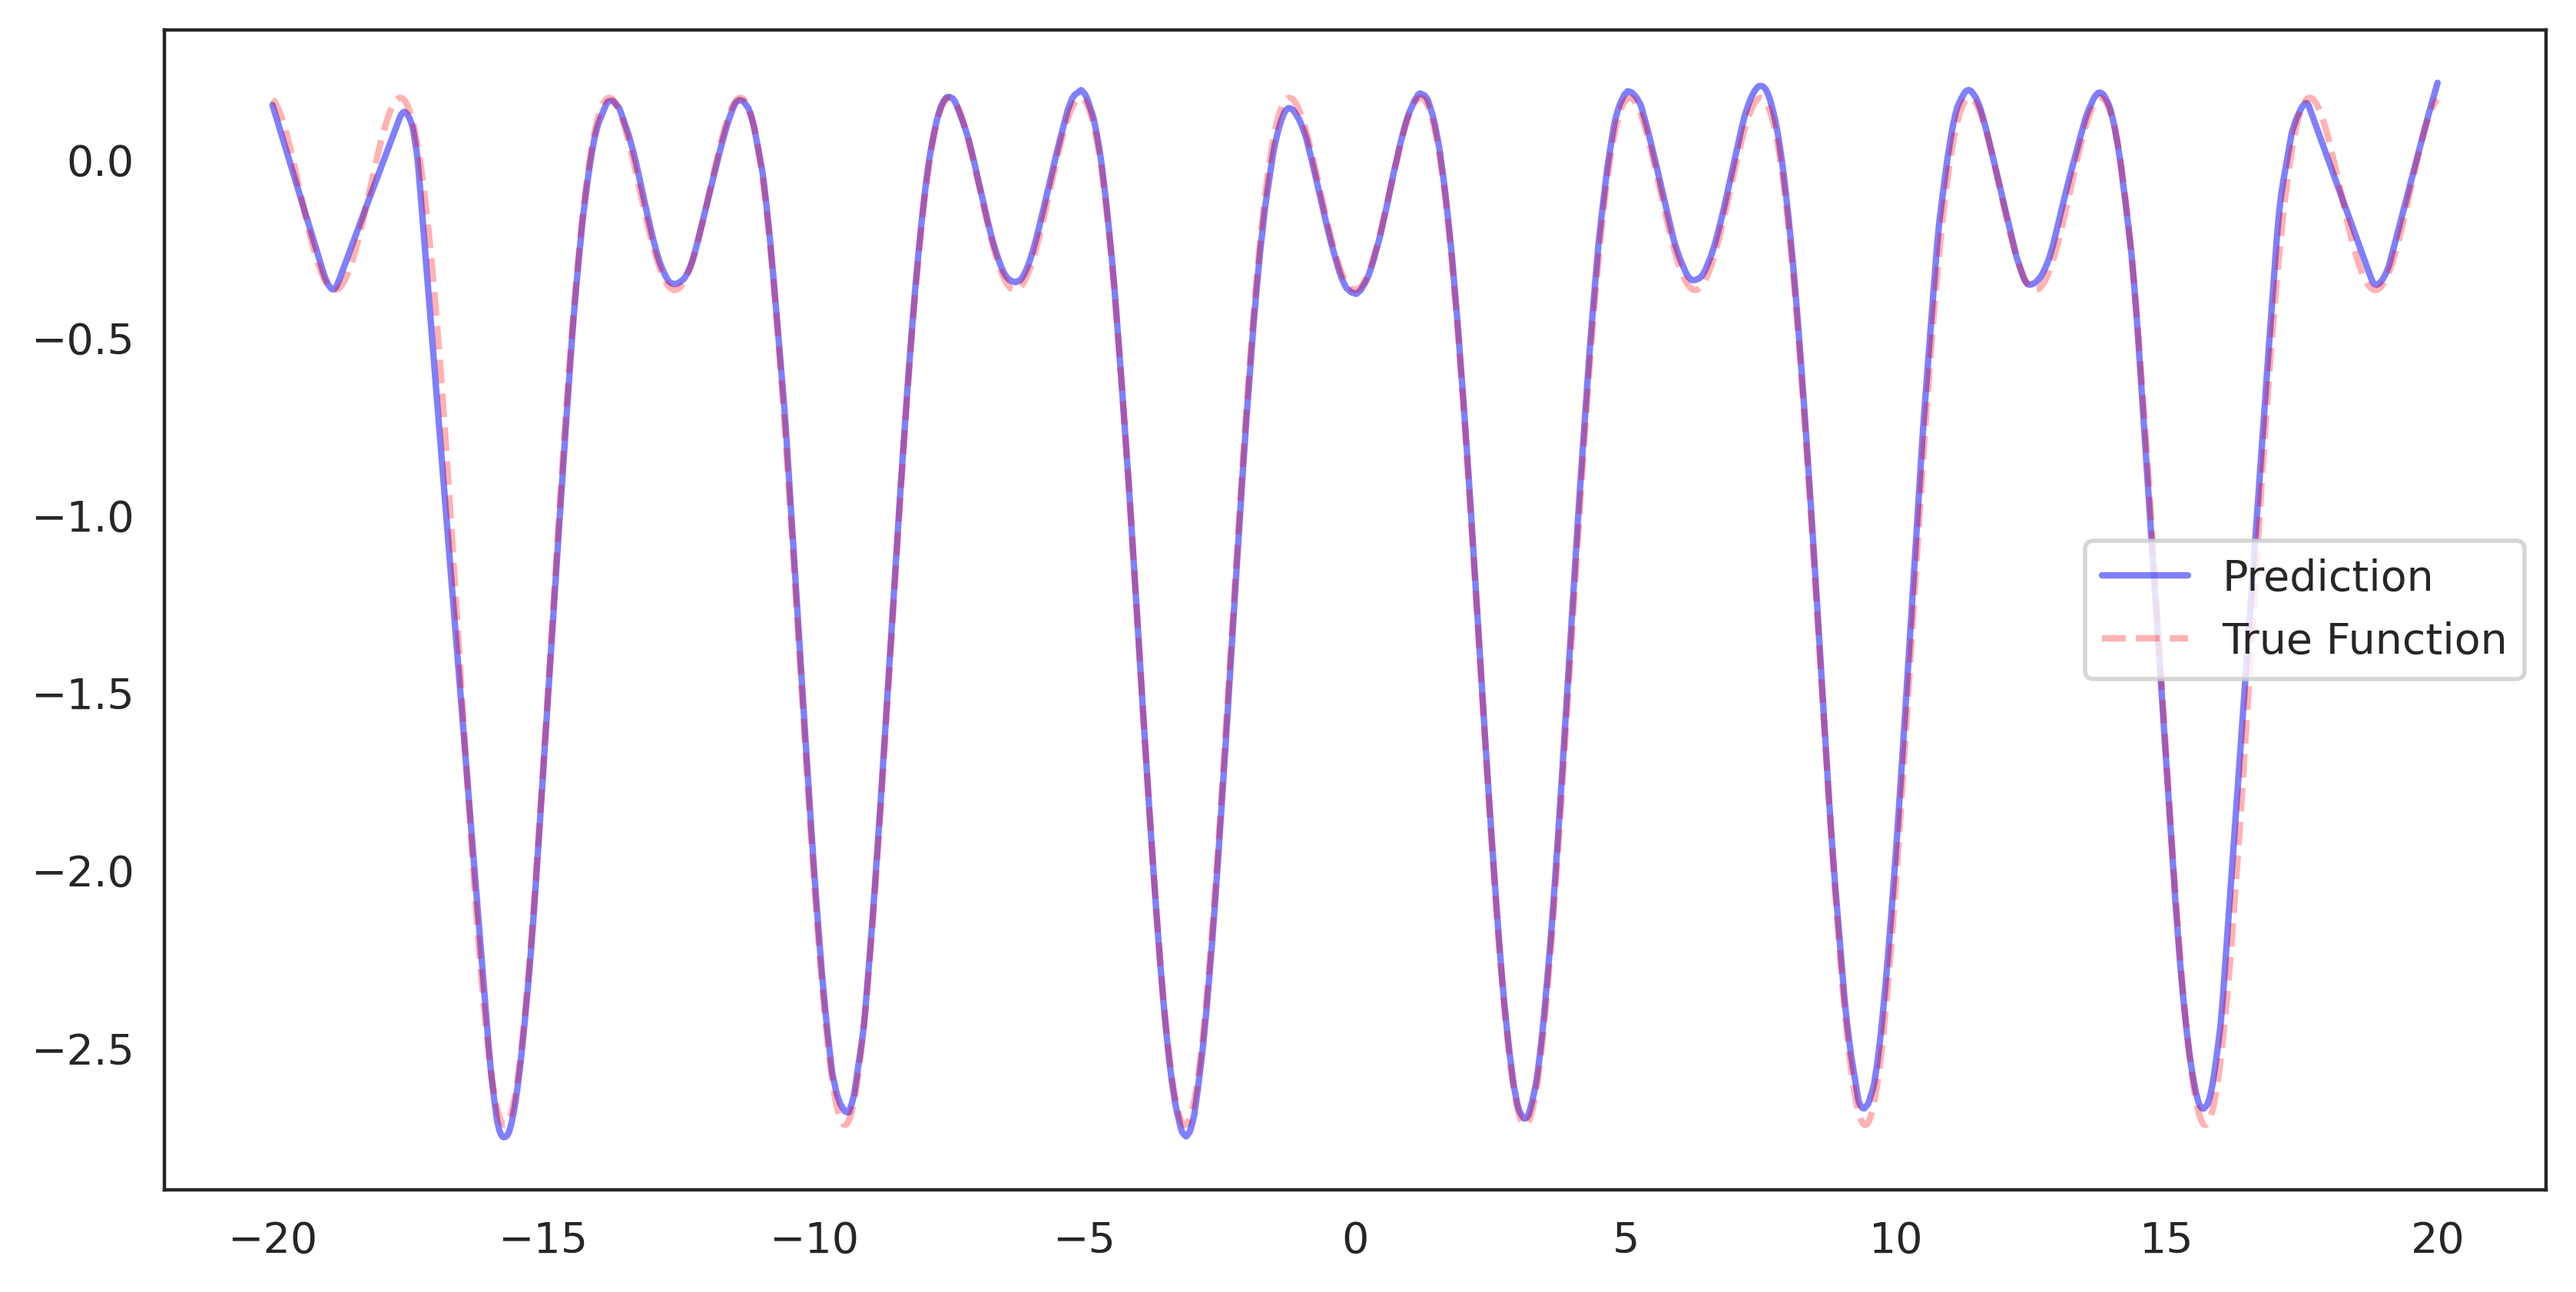

In [ ]:
for layers in [1, 2, 3]:

    model = UAT_generator(2048, layers, tensorflow.keras.activations.relu)
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
                  loss='mse')
    history = model.fit(x, y, epochs=2000, verbose=0)
    pred = model.predict(x)
    plt.figure(figsize=(10, 5), dpi=400)
    plt.plot(x, pred, color='blue', alpha=0.5, label='Prediction')
    plt.plot(x, y, color='red', linestyle='dashed', alpha=0.3, label='True Function')
    plt.legend()
    plt.show()
    plt.close()

---

## Research

### Leaky Gates

In [ ]:
class LeakyGate(keras.layers.Layer):

    def __init__(self):
        super(LeakyGate, self).__init__()

    def build(self, input_shape):
        self.w = self.add_weight(shape=(1,input_shape[-1],),
                               initializer='random_normal',
                               trainable=True)
        self.b = self.add_weight(shape=(1,input_shape[-1],),
                               initializer='random_normal',
                               trainable=True)
        self.mult = keras.layers.Multiply()
        

    def call(self, inputs):
        return self.mult([inputs, self.w]) + self.b

In [ ]:
inp = L.Input((128,))
gate = LeakyGate()
gated = gate(inp)

model = keras.models.Model(inputs=inp, outputs=gated)
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
x = np.random.normal(size=(512, 128))
mask = np.random.choice([0,1], size=(1, 128))
y = x * mask

model.compile(optimizer='adam', loss='mse')
model.fit(x, y, epochs=200)

### Wide & Deep

In [ ]:
data = pd.read_csv('../input/forest-cover-type-dataset/covtype.csv')
data

In [ ]:
# initiate data
wide_data = data.drop('Cover_Type', axis=1).copy()
deep_cont_data = data[['Elevation', 'Aspect', 'Slope', 
                       'Horizontal_Distance_To_Hydrology',
                       'Vertical_Distance_To_Hydrology',
                       'Horizontal_Distance_To_Roadways',
                       'Horizontal_Distance_To_Fire_Points',
                       'Hillshade_9am', 'Hillshade_Noon',
                       'Hillshade_3pm']]
deep_embed_data = {}

# obtain categorical features
soil_types = [col for col in data.columns if 'Soil_Type' in col]
wild_areas = [col for col in data.columns if 'Wilderness_Area' in col]

# cross soil types and wild areas
for soil_type in soil_types:
    for wild_area in wild_areas:
        crossed = wide_data[soil_type] * wide_data[wild_area]
        wide_data[f'{soil_type}X{wild_area}'] = crossed

# get ordinal representations of categorical features
deep_embed_data['soil_type'] = np.argmax(data[soil_types].values, axis=1)
deep_embed_data['wild_area'] = np.argmax(data[wild_areas].values, axis=1)

In [ ]:
wide_inp = L.Input((len(wide_data.columns)))
wide_out = L.Dense(7)(wide_inp)
wide_model = keras.models.Model(inputs=wide_inp,
                                outputs=wide_out)

deep_inp = L.Input((len(deep_cont_data.columns)))
deep_soil_inp = L.Input((1,))
deep_soil_embed = L.Embedding(np.max(deep_embed_data['soil_type']) + 1,
                              16)(deep_soil_inp)
deep_wild_inp = L.Input((1,))
deep_wild_embed = L.Embedding(np.max(deep_embed_data['wild_area']) + 1,
                              16)(deep_wild_inp)
deep_concat = L.Concatenate()([deep_inp,
                               L.Flatten()(deep_soil_embed),
                               L.Flatten()(deep_wild_embed)])
deep_dense1 = L.Dense(32, activation='relu')(deep_concat)
deep_dense2 = L.Dense(32, activation='relu')(deep_dense1)
deep_dense3 = L.Dense(32, activation='relu')(deep_dense2)
deep_out = L.Dense(7)(deep_dense3)
deep_model = keras.models.Model(inputs={'cont_feats': deep_inp,
                                        'soil': deep_soil_inp,
                                        'wild': deep_wild_inp},
                                outputs=deep_out)

In [ ]:
from tensorflow.keras.experimental import WideDeepModel
model = WideDeepModel(wide_model, deep_model, activation='softmax')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit([wide_data, {'cont_feats':deep_cont_data,
                       'soil':deep_embed_data['soil_type'],
                       'wild':deep_embed_data['wild_area']}],
          data['Cover_Type'] - 1,
          epochs=10) 

### SELU

In [ ]:
alpha_, lambda_ = 1.6732, 1.0507
selu = np.vectorize(lambda x: lambda_ * (alpha_ * np.exp(x) - alpha_ if x < 0 else x))
plt.figure(figsize=(10, 5), dpi=400)
x = np.linspace(-5, 3, 100)
plt.plot(x, selu(x), color='black')
plt.plot([-5, 3], [0, 0], color='black', alpha=0.2, linestyle='--')
plt.show()

In [ ]:
data = pd.read_csv('../input/mpempe/mouse-protein-expression.csv').drop('Unnamed: 0', axis=1)
X['Genotype'] -= 1
X['Treatment'] -= 1
X['Behavior'] -= 1
X, y = data.drop('class', axis=1), data['class'] - 1
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((60_000, 784)) / 255
from keras import layers as L
inp = L.Input((784,))
x = inp
for i in range(8):
    x = L.Dense(32, activation='selu')(x)
out = L.Dense(10, activation='softmax')(x)
model = keras.models.Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

In [ ]:
layers = 8

x = x_train
for i in range(layers):
    x = model.layers[i+1](x)
    print(np.mean(x.numpy()), np.var(x.numpy()))

### Regularization Learning Networks

In [ ]:
!wget -O rln.py https://raw.githubusercontent.com/irashavitt/regularization_learning_networks/master/Implementations/Keras_implementation.py
import rln
import importlib
importlib.reload(rln)
from rln import RLNCallback

In [ ]:
data = pd.read_csv('../input/forest-cover-type-dataset/covtype.csv')
X, y = data.drop('Cover_Type', axis=1), data['Cover_Type'] - 1
X, y = np.array(X), np.array(y)

In [ ]:
'''
This code cell is directly taken from the official repository.
'''

from keras.callbacks import Callback
from keras import backend as K
from pandas import DataFrame
import numpy as np


class RLNCallback(Callback):
    def __init__(self, layer, norm=1, avg_reg=-7.5, learning_rate=6e5):
        """
        An implementation of Regularization Learning, described in https://arxiv.org/abs/1805.06440, as a Keras
        callback.
        :param layer: The Keras layer to which we apply regularization learning.
        :param norm: Norm of the regularization. Currently supports only l1 and l2 norms. Best results were obtained
        with l1 norm so far.
        :param avg_reg: The average regularization coefficient, Theta in the paper.
        :param learning_rate: The learning rate of the regularization coefficients, nu in the paper. Note that since we
        typically have many weights in the network, and we optimize the coefficients in the log scale, optimal learning
        rates tend to be large, with best results between 10^4-10^6.
        """
        super(RLNCallback, self).__init__()
        self._kernel = layer.kernel
        self._prev_weights, self._weights, self._prev_regularization = [None] * 3
        self._avg_reg = avg_reg
        self._shape = K.transpose(self._kernel).get_shape().as_list()
        self._lambdas = DataFrame(np.ones(self._shape) * self._avg_reg)
        self._lr = learning_rate
        assert norm in [1, 2], "Only supporting l1 and l2 norms at the moment"
        self.norm = norm

    def on_train_begin(self, logs=None):
        self._update_values()

    def on_batch_end(self, batch, logs=None):
        self._prev_weights = self._weights
        self._update_values()
        gradients = self._weights - self._prev_weights

        # Calculate the derivatives of the norms of the weights
        if self.norm == 1:
            norms_derivative = np.sign(self._weights)
        else:
            norms_derivative = self._weights * 2

        if self._prev_regularization is not None:
            # This is not the first batch, and we need to update the lambdas
            lambda_gradients = gradients.multiply(self._prev_regularization)
            self._lambdas -= self._lr * lambda_gradients

            # Project the lambdas onto the simplex \sum(lambdas) = Theta
            translation = (self._avg_reg - self._lambdas.mean().mean())
            self._lambdas += translation

        # Clip extremely large lambda values to prevent overflow
        max_lambda_values = np.log(np.abs(self._weights / norms_derivative)).fillna(np.inf)
        self._lambdas = self._lambdas.clip(upper=max_lambda_values)

        # Update the weights
        regularization = norms_derivative.multiply(np.exp(self._lambdas))
        self._weights -= regularization
        K.set_value(self._kernel, self._weights.values.T)
        self._prev_regularization = regularization

    def _update_values(self):
        self._weights = DataFrame(K.eval(self._kernel)

In [ ]:
from keras import regularizers as R

NUM_LAYERS = 4

inp = L.Input((X.shape[-1],))
x = inp
for i in range(NUM_LAYERS):
    x = L.Dense(32, activation='selu',
                kernel_regularizer=R.L1())(x)
out = L.Dense(7, activation='softmax')(x)
model = keras.models.Model(inputs=inp, outputs=out)

callbacks = [RLNCallback(model.layers[i]) for i in range(1, 1 + NUM_LAYERS)]

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(X, y, epochs=10)